Student Name : 
 
1) Mohit Patil Email : mohitz4418@gmail.com

# <font color = blue> Bank loan approval case study </font>

We have the data of the clients applying for the loan and also the previous application records. In this case study we will try to find the insights that will help bank to take a decision whether to approve the loan to the client or not. And will help bank get more profit and reduce the risk of default that is loan not getting repaid, using python.

### Import necessary libraries and filter warnings.

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

### 1. Import the "application_data.csv"

In [4]:
# Reading the "application_data.csv" Dataset.

application_data = pd.read_csv("C:\\Users\\Mohit'z\\Desktop\\Upgrad\\Credit Card EDA Case Study\\application_data.csv")

In [5]:
# Displaying top 5 records from "application_data.csv" dataset.

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

### 2. Check the structure of data.

In [6]:
# Determining the shape of dataset.

application_data.shape

(307511, 122)

In [7]:
# Understanding the data.

application_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
# Describe the data.

application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

### 3. Data quality check and missing values.

### 3.1. Find the precentage of missing values for all columns. 

In [9]:
# Finding the percentage of null values in each column 

application_data_null_count = round(application_data.isnull().sum() * 100 / len(application_data),2)
application_data_null_count

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [10]:
# Now lets calculate the number of null values in Dataframe.
# Now we will define a function which will find percentage of null values in each column 

def get_null_value(s):
    n = s.isnull().sum()
    n2 = len(s)
    return round(n/n2, 3)

In [11]:
# Use "get_null_value" function to calculate null values in each column in application_data dataframe. 

get_null_value(application_data)

SK_ID_CURR                    0.000
TARGET                        0.000
NAME_CONTRACT_TYPE            0.000
CODE_GENDER                   0.000
FLAG_OWN_CAR                  0.000
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     0.135
AMT_REQ_CREDIT_BUREAU_WEEK    0.135
AMT_REQ_CREDIT_BUREAU_MON     0.135
AMT_REQ_CREDIT_BUREAU_QRT     0.135
AMT_REQ_CREDIT_BUREAU_YEAR    0.135
Length: 122, dtype: float64

### 3.2. Remove columns with high missing value percentage > 50%

In [12]:
# Now delete those columns where null values > 50 percent.


for column, values in application_data.iteritems():
    if get_null_value(application_data[column]) > 0.50:
        application_data.drop(column, axis = 1, inplace = True)

In [13]:
# Determining the shape of dataset.

application_data.shape

(307511, 81)

In [14]:
application_data_null_count = round(application_data.isnull().sum() * 100 / len(application_data),2)
application_data_null_count

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

So now we have some columns which has around 13 percent of missing values.

So now we calculate the imputing value for 5 such columns which has missing value around 13 percent and comment it.

### 3.3. For columns which has less percentage (around 13%)
#### We need to check what will be the best metric to impute the missing values. 

#### So choose 5 columns to perform this process which has around 13 percent of missing values.
1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

Now calculate the imputing value for " 1) AMT_REQ_CREDIT_BUREAU_HOUR " column. Since this column is Categorical Column lets calculate its mode.

In [15]:
application_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

#### So for "AMT_REQ_CREDIT_BUREAU_HOUR" column the imputing value for missing value is "0"

Now calculate the imputing value for " 2) AMT_REQ_CREDIT_BUREAU_DAY " column. Since this column is Categorical Column lets calculate its mode.

In [16]:
application_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

#### So for "AMT_REQ_CREDIT_BUREAU_HOUR" column the imputing value for missing value is "0"

Now calculate the imputing value for " 3) AMT_REQ_CREDIT_BUREAU_WEEK " column. Since this column is Categorical Column lets calculate its mode.

In [17]:
application_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

#### So for "AMT_REQ_CREDIT_BUREAU_WEEK" column the imputing value for missing value is "0"

Now calculate the imputing value for " 4) AMT_REQ_CREDIT_BUREAU_MON " column. Since this column is Categorical Column lets calculate its mode.

In [18]:
application_data.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

#### So for "AMT_REQ_CREDIT_BUREAU_MON" column the imputing value for missing value is "0"

Now calculate the imputing value for " 5) AMT_REQ_CREDIT_BUREAU_QRT " column. Since this column is Categorical Column lets calculate its mode.

In [19]:
application_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

#### So for "AMT_REQ_CREDIT_BUREAU_QRT" column the imputing value for missing value is "0"

Now calculate the imputing value for " 6) AMT_REQ_CREDIT_BUREAU_YEAR" column. Since this column is Categorical Column lets calculate its mode.

In [20]:
application_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

#### So for "AMT_REQ_CREDIT_BUREAU_YEAR" column the imputing value for missing value is "0"

### 3.4. Check the datatypes of all the columns and change the datatype like negative age and date.
#### Now change the data-types of columns to its appropriate type.

Lets check which column has inappropriate datatype.

In [21]:
# find current datatype of variables.

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [22]:
# find unique values from each column know its type ie. numerical/categorical.

application_data.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

#### Here we found that 
FLAG_DOCUMENT_3, FLAG_PHONE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_4, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, FLAG_DOCUMENT_21,
FLAG_DOCUMENT_20, FLAG_DOCUMENT_19, FLAG_DOCUMENT_18, FLAG_DOCUMENT_17,FLAG_DOCUMENT_16, FLAG_DOCUMENT_15, FLAG_DOCUMENT_14,
FLAG_DOCUMENT_13, FLAG_DOCUMENT_12, FLAG_DOCUMENT_11, FLAG_DOCUMENT_10, FLAG_DOCUMENT_9, FLAG_DOCUMENT_8, FLAG_DOCUMENT_7, FLAG_DOCUMENT_6, FLAG_DOCUMENT_5, FLAG_CONT_MOBILE, FLAG_WORK_PHONE, FLAG_EMAIL, FLAG_MOBIL, TARGET, FLAG_EMP_PHONE,
REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, AMT_REQ_CREDIT_BUREAU_HOUR, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, DEF_30_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_QRT, CNT_CHILDREN,
CNT_FAM_MEMBERS, HOUR_APPR_PROCESS_START, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR,
FLOORSMAX_MODE, OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, FLOORSMAX_MEDI,
DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_BIRTH
#### This columns has inappropriate datatype and some column values has negative so we need to convert it into positive and its appropriate datatype. 

In [23]:
application_data = application_data.astype({'FLAG_DOCUMENT_3':'object',
                                            'FLAG_PHONE':'object',
                                            'FLAG_DOCUMENT_2':'object',
                                            'FLAG_DOCUMENT_4':'object',
                                            'REG_REGION_NOT_LIVE_REGION':'object',
                                            'REG_REGION_NOT_WORK_REGION':'object',
                                            'LIVE_REGION_NOT_WORK_REGION':'object',
                                            'REG_CITY_NOT_LIVE_CITY':'object',
                                            'REG_CITY_NOT_WORK_CITY':'object',
                                            'LIVE_CITY_NOT_WORK_CITY':'object',
                                            'FLAG_DOCUMENT_21':'object',
                                            'FLAG_DOCUMENT_20':'object',
                                            'FLAG_DOCUMENT_19':'object',
                                            'FLAG_DOCUMENT_18':'object',
                                            'FLAG_DOCUMENT_17':'object',
                                            'FLAG_DOCUMENT_16':'object',
                                            'FLAG_DOCUMENT_15':'object',
                                            'FLAG_DOCUMENT_14':'object',
                                            'FLAG_DOCUMENT_13':'object',
                                            'FLAG_DOCUMENT_12':'object',
                                            'FLAG_DOCUMENT_11':'object',
                                            'FLAG_DOCUMENT_10':'object',
                                            'FLAG_DOCUMENT_9':'object',
                                            'FLAG_DOCUMENT_8':'object',
                                            'FLAG_DOCUMENT_7':'object',
                                            'FLAG_DOCUMENT_6':'object',
                                            'FLAG_DOCUMENT_5':'object',
                                            'FLAG_CONT_MOBILE':'object',
                                            'FLAG_WORK_PHONE':'object',
                                            'FLAG_EMAIL':'object',
                                            'FLAG_MOBIL':'object',
                                            'TARGET':'object',
                                            'FLAG_EMP_PHONE':'object',
                                            'REGION_RATING_CLIENT_W_CITY':'object',
                                            'REGION_RATING_CLIENT':'object',
                                            'AMT_REQ_CREDIT_BUREAU_HOUR':'object',
                                            'DEF_60_CNT_SOCIAL_CIRCLE':'object',
                                            'AMT_REQ_CREDIT_BUREAU_WEEK':'object',
                                            'AMT_REQ_CREDIT_BUREAU_DAY':'object',
                                            'DEF_30_CNT_SOCIAL_CIRCLE':'object',
                                            'AMT_REQ_CREDIT_BUREAU_QRT':'object',
                                            'CNT_CHILDREN':'object',
                                            'CNT_FAM_MEMBERS':'object',
                                            'HOUR_APPR_PROCESS_START':'object',
                                            'AMT_REQ_CREDIT_BUREAU_MON':'object',
                                            'AMT_REQ_CREDIT_BUREAU_YEAR':'object',
                                            'FLOORSMAX_MODE':'object',
                                            'OBS_30_CNT_SOCIAL_CIRCLE':'object',
                                            'OBS_60_CNT_SOCIAL_CIRCLE':'object',
                                            'FLOORSMAX_MEDI':'object'})

Now we have to convert columns with negative values into positive values

In [24]:
# use abs() function to change negative age to positive.

application_data['DAYS_LAST_PHONE_CHANGE'] = application_data['DAYS_LAST_PHONE_CHANGE'].abs()
application_data['DAYS_ID_PUBLISH'] = application_data['DAYS_ID_PUBLISH'].abs()
application_data['DAYS_EMPLOYED'] = application_data['DAYS_EMPLOYED'].abs()
application_data['DAYS_REGISTRATION'] = application_data['DAYS_REGISTRATION'].abs()
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].abs()

In [25]:
# Lets get the top values from dataframe to know result.

application_data[['DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_BIRTH']].head()

,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_BIRTH
0,1134.0,2120,637,3648.0,9461
1,828.0,291,1188,1186.0,16765
2,815.0,2531,225,4260.0,19046
3,617.0,2437,3039,9833.0,19005
4,1106.0,3458,3038,4311.0,19932


Now we have columns with positive values. So convert them in its appropriate datatype.

Before that one of this column contain a single null value lets handle it.

In [26]:
# Find the null values from this column.

application_data[['DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_BIRTH']].isnull().sum()

DAYS_LAST_PHONE_CHANGE    1
DAYS_ID_PUBLISH           0
DAYS_EMPLOYED             0
DAYS_REGISTRATION         0
DAYS_BIRTH                0
dtype: int64

While converting it into its appropriate datatype there is a error because one of this column contains null value.
so fill that null value using mean since it is a continous column.

In [27]:
application_data['DAYS_LAST_PHONE_CHANGE'].fillna((application_data["DAYS_LAST_PHONE_CHANGE"].mean()), inplace = True)

In [28]:
# Now the null values are removed.

application_data[['DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_BIRTH']].isnull().sum()

DAYS_LAST_PHONE_CHANGE    0
DAYS_ID_PUBLISH           0
DAYS_EMPLOYED             0
DAYS_REGISTRATION         0
DAYS_BIRTH                0
dtype: int64

In [29]:
# Change this columns into its appropriate datatype.

application_data = application_data.astype({'DAYS_LAST_PHONE_CHANGE':'int64','DAYS_ID_PUBLISH':'int64','DAYS_EMPLOYED':'int64','DAYS_REGISTRATION':'int64','DAYS_BIRTH':'int64'})

We have changed the datatype of column. Now check result of it.

In [30]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  object 
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

From result we have achieved the conversion of column datatypes.

### 3.5. Now for Numerical columns check for outliers & report them for atleast 5 variables. & add observations and reasoning.

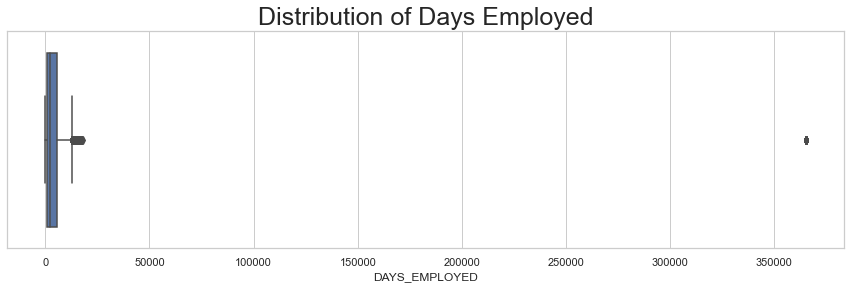

In [31]:
# Check outliers for "DAYS_EMPLOYED" column.

plt.figure(figsize = [15,4])
sns.set(style="whitegrid")
sns.boxplot(x = application_data['DAYS_EMPLOYED'])
plt.title("Distribution of Days Employed", fontsize = 25)
plt.show()

Inferences / Observation :-

1. In the "DAYS_EMPLOYED" there is a value present at 36K range, this won't be possible. This could have occured during data entry.
2. There are some outiliers in Days Employed.

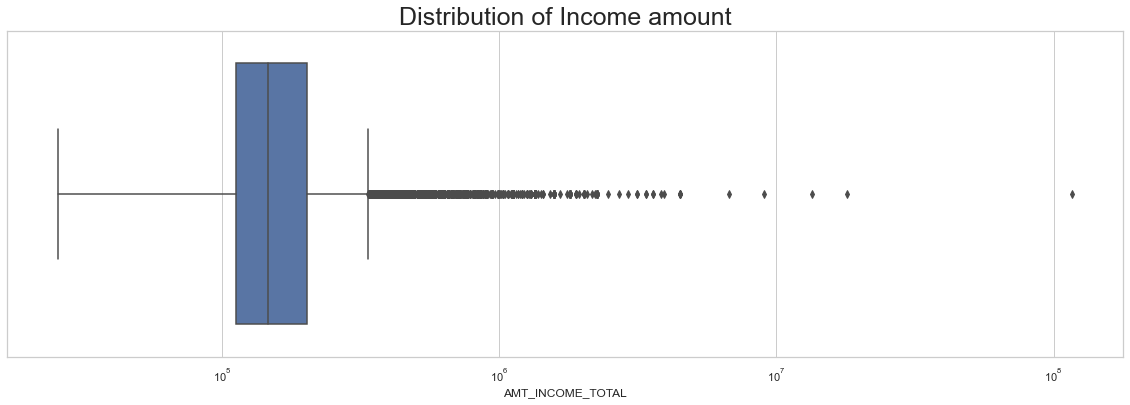

In [32]:
# Check outliers for "AMT_INCOME_TOTAL" column.

plt.figure(figsize = [20,6])
sns.set(style="whitegrid")
sns.boxplot(x = application_data['AMT_INCOME_TOTAL'])
plt.title("Distribution of Income amount", fontsize = 25)
plt.xscale('log')
plt.show()

Inferences / Observation :-

1. Some ouliers are noticed in income amount
2. The third quartile is very slim for income amount.
3. the MAX amount is way largert than the other statistical datas. [Mean, (25,50,75) percentiles]

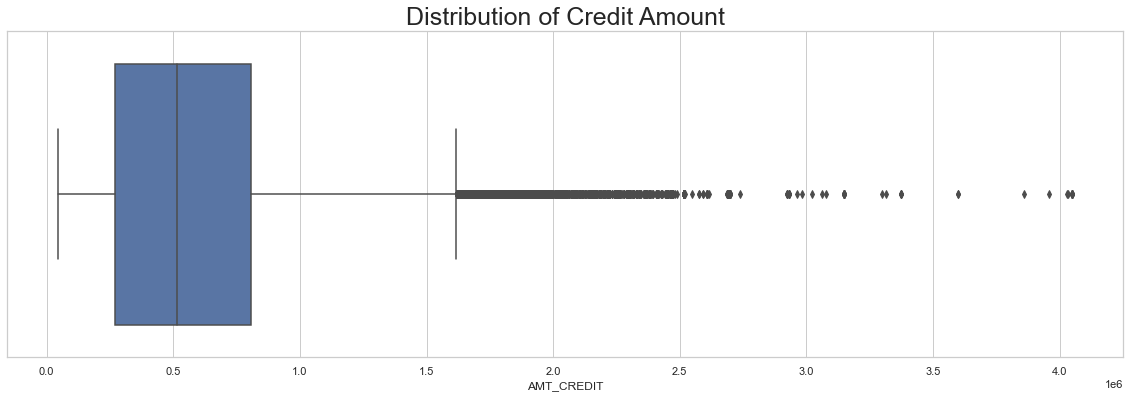

In [33]:
# Check outliers for "AMT_CREDIT" column.

plt.figure(figsize = [20,6])
sns.set(style="whitegrid")
sns.boxplot(x = application_data['AMT_CREDIT'])
plt.title("Distribution of Credit Amount", fontsize = 25)
plt.show()

Inferences / Observation :-

1. Some ouliers are noticed in credit amount.
2. The credit of clients are mostly present in between the 50 percent IQR to 75 percent IQR.

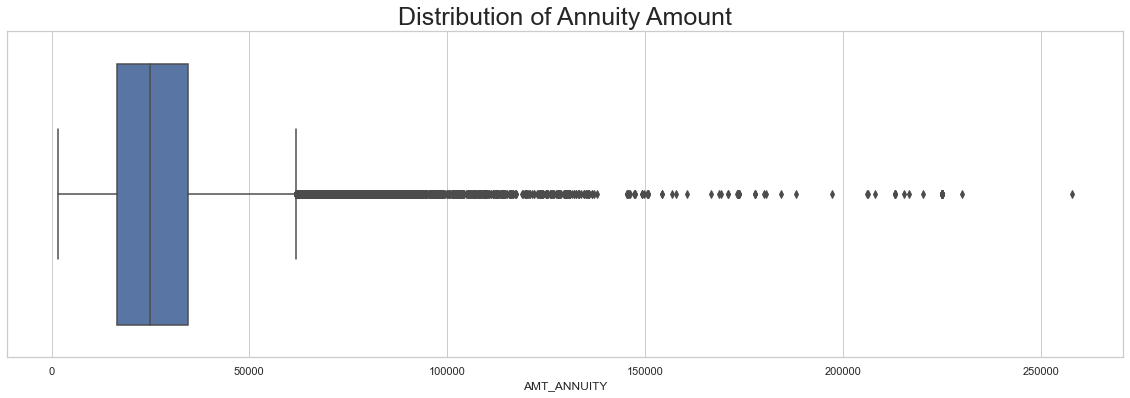

In [34]:
# Check outliers for "AMT_ANNUITY" column.

plt.figure(figsize = [20,6])
sns.set(style="whitegrid")
sns.boxplot(x = application_data['AMT_ANNUITY'])
plt.title("Distribution of Annuity Amount", fontsize = 25)
plt.show()

Inferences / Observation :-
    
1. There are so many outliers in Annuity Amount.
2. Most of the annuity clients are from thirs quartile.

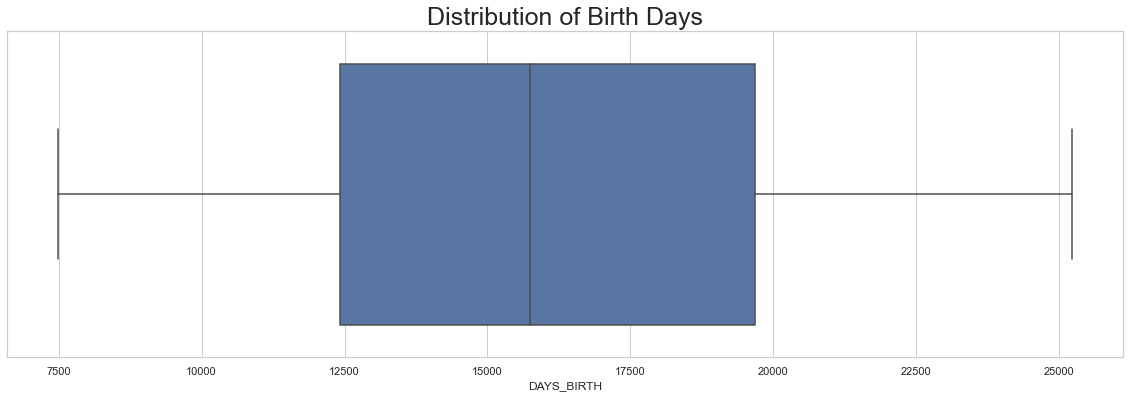

In [35]:
# Check outliers for "DAYS_BIRTH" column.

plt.figure(figsize = [20,6])
sns.set(style="whitegrid")
sns.boxplot(x = application_data['DAYS_BIRTH'])
plt.title("Distribution of Birth Days", fontsize = 25)
plt.show()

Inferences / Observation :-

1. There are no outliers in Days Birth.
2. All clients have age approximate between 32 to 55.

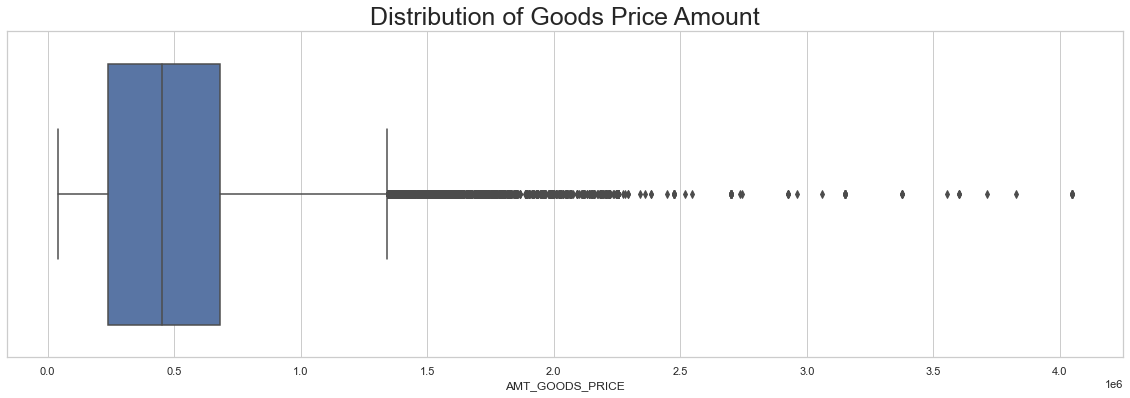

In [36]:
# Check outliers for "AMT_GOODS_PRICE" column.

plt.figure(figsize = [20,6])
sns.set(style="whitegrid")
sns.boxplot(x = application_data['AMT_GOODS_PRICE'])
plt.title("Distribution of Goods Price Amount", fontsize = 25)
plt.show()

Inferences / Observation :-
    
1. There are some ouliers in AMT_GOODS_PRICE.

2. All the ouliers are those invalid price of goods for which the loanis given.

### 3.6. Binning of Continous Variable.

Check if you need to bin any variable in diffrent categories. Do this for atleast 2 variables.

#### 1. For DAYS_BIRTH variable

In [37]:
# Check the min & max value of "DAYS_BIRTH" column to decide its bin.

application_data.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [38]:
# Define the bins.

application_data['Age_Category_based_on_DAYS_BIRTH'] = pd.cut(application_data.DAYS_BIRTH, bins = [0, 365, 6205, 10950, 16425, 21535, 32485, 36500], 
                                                              labels = ['Baby', 'Child', 'Young Adults', 'Middle-age Adults', 'Old-age Adults', 'Above 59 - Below 89', 'Above 89'])

In [39]:
# Check the result.

application_data[['SK_ID_CURR','Age_Category_based_on_DAYS_BIRTH']].head()

,SK_ID_CURR,Age_Category_based_on_DAYS_BIRTH
0,100002,Young Adults
1,100003,Old-age Adults
2,100004,Old-age Adults
3,100006,Old-age Adults
4,100007,Old-age Adults


In [40]:
# Check the result.

application_data.Age_Category_based_on_DAYS_BIRTH.value_counts()

Middle-age Adults      123714
Old-age Adults          96562
Young Adults            45021
Above 59 - Below 89     42214
Above 89                    0
Child                       0
Baby                        0
Name: Age_Category_based_on_DAYS_BIRTH, dtype: int64

#### 2. For AMT_INCOME_TOTAL variable.

In [41]:
# Define the bins using below function.

def AMT_INCOME_FUNC(income):
    if income < 337500 and income >= 234000:
        return("High")
    elif income < 234000 and income >= 147150:
        return("Moderate")
    elif income < 147150 and income >= 112500:
        return("Low")
    else:
        return("Extremly Low")

In [42]:
# Use above function to form bins.

application_data['AMT_INCOME_CATEGORY'] = application_data.AMT_INCOME_TOTAL.apply(AMT_INCOME_FUNC)
application_data['AMT_INCOME_CATEGORY']

0             Moderate
1                 High
2         Extremly Low
3                  Low
4                  Low
              ...     
307506        Moderate
307507    Extremly Low
307508        Moderate
307509        Moderate
307510        Moderate
Name: AMT_INCOME_CATEGORY, Length: 307511, dtype: object

In [43]:
# Check the result

application_data.AMT_INCOME_CATEGORY.value_counts()

Moderate        106966
Extremly Low     85384
Low              84194
High             30967
Name: AMT_INCOME_CATEGORY, dtype: int64

In [44]:
# Check the result.

application_data[['SK_ID_CURR','AMT_INCOME_TOTAL','AMT_INCOME_CATEGORY']]

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_INCOME_CATEGORY
0,100002,202500.0,Moderate
1,100003,270000.0,High
2,100004,67500.0,Extremly Low
3,100006,135000.0,Low
4,100007,121500.0,Low
...,...,...,...
307506,456251,157500.0,Moderate
307507,456252,72000.0,Extremly Low
307508,456253,153000.0,Moderate
307509,456254,171000.0,Moderate


#### We have some unnecessary columns in the dataframe. lets drop them and filter dataframe. 

In [45]:
application_data = application_data.filter(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                                            'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                                            'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                                            'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 
                                            'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
                                            'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
                                            'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
                                            'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
                                            'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 
                                            'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                                            'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                                            'DAYS_LAST_PHONE_CHANGE','AMT_INCOME_CATEGORY','Age_Category_based_on_DAYS_BIRTH'])

In [46]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   SK_ID_CURR                        307511 non-null  int64   
 1   TARGET                            307511 non-null  object  
 2   NAME_CONTRACT_TYPE                307511 non-null  object  
 3   CODE_GENDER                       307511 non-null  object  
 4   FLAG_OWN_CAR                      307511 non-null  object  
 5   FLAG_OWN_REALTY                   307511 non-null  object  
 6   CNT_CHILDREN                      307511 non-null  object  
 7   AMT_INCOME_TOTAL                  307511 non-null  float64 
 8   AMT_CREDIT                        307511 non-null  float64 
 9   AMT_ANNUITY                       307499 non-null  float64 
 10  AMT_GOODS_PRICE                   307233 non-null  float64 
 11  NAME_TYPE_SUITE                   30621

## 4. Analysis.

### 4.1. Check the imbalance percentage.

In [47]:
# Find imbanalce percentage.

100 * application_data.TARGET.value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

# Plot a graph to visualize the imbalace percentage.

Count_for_TARGET = sns.countplot("TARGET", data = application_data)
plt.show()

Since from above code and countplot we can calculate that it is Imbalance.   
Where in TARGET variable for value 0 it has 91.92% and for value 1 it is 8.07% 

### 4.2. Divide the data into 2 dataframes based on TARGET variable.

In [49]:
# Use 2 dataframe to divide the TARGET variable.

Target_0 = application_data[application_data.TARGET == 0]
Target_1 = application_data[application_data.TARGET == 1]

In [50]:
# Understand the newly created dataframe "Target_0"

Target_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   SK_ID_CURR                        282686 non-null  int64   
 1   TARGET                            282686 non-null  object  
 2   NAME_CONTRACT_TYPE                282686 non-null  object  
 3   CODE_GENDER                       282686 non-null  object  
 4   FLAG_OWN_CAR                      282686 non-null  object  
 5   FLAG_OWN_REALTY                   282686 non-null  object  
 6   CNT_CHILDREN                      282686 non-null  object  
 7   AMT_INCOME_TOTAL                  282686 non-null  float64 
 8   AMT_CREDIT                        282686 non-null  float64 
 9   AMT_ANNUITY                       282674 non-null  float64 
 10  AMT_GOODS_PRICE                   282429 non-null  float64 
 11  NAME_TYPE_SUITE                   28146

In [51]:
# Understand the newly created dataframe "Target_1"

Target_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   SK_ID_CURR                        24825 non-null  int64   
 1   TARGET                            24825 non-null  object  
 2   NAME_CONTRACT_TYPE                24825 non-null  object  
 3   CODE_GENDER                       24825 non-null  object  
 4   FLAG_OWN_CAR                      24825 non-null  object  
 5   FLAG_OWN_REALTY                   24825 non-null  object  
 6   CNT_CHILDREN                      24825 non-null  object  
 7   AMT_INCOME_TOTAL                  24825 non-null  float64 
 8   AMT_CREDIT                        24825 non-null  float64 
 9   AMT_ANNUITY                       24825 non-null  float64 
 10  AMT_GOODS_PRICE                   24804 non-null  float64 
 11  NAME_TYPE_SUITE                   24755 non-null  obj

### 4.3. Perform Univariate analysis for categorical variables for both 0 and 1. Compare the target variable across categories of categorical variables.

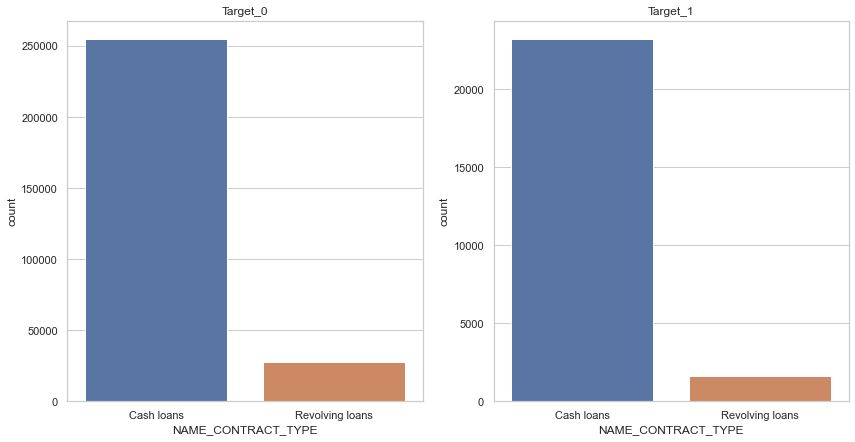

In [52]:
# Univariate analysis for "NAME_CONTRACT_TYPE" column.

plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
sns.countplot(Target_0['NAME_CONTRACT_TYPE'])
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(Target_1['NAME_CONTRACT_TYPE'])
plt.title("Target_1")
plt.show()

Observation :-

1. we can see the result as Target_0 has more count of Cash loans and Revolving loans as compare to Target_1.

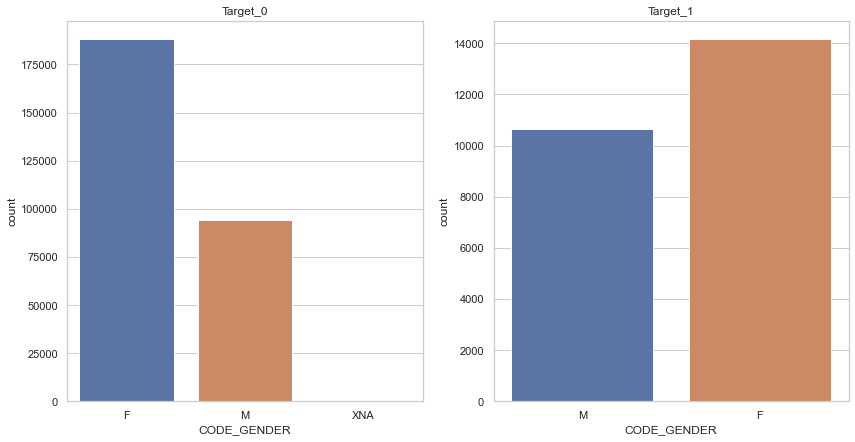

In [53]:
# Univariate analysis for "CODE_GENDER" column.

plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
sns.countplot(Target_0['CODE_GENDER'])
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(Target_1['CODE_GENDER'])
plt.title("Target_1")
plt.show()

Observation :-

1. Target_0 has more number of Female clients as compare to Target_1.
2. Target_1 has more number of Male clients as compare to Target_0.

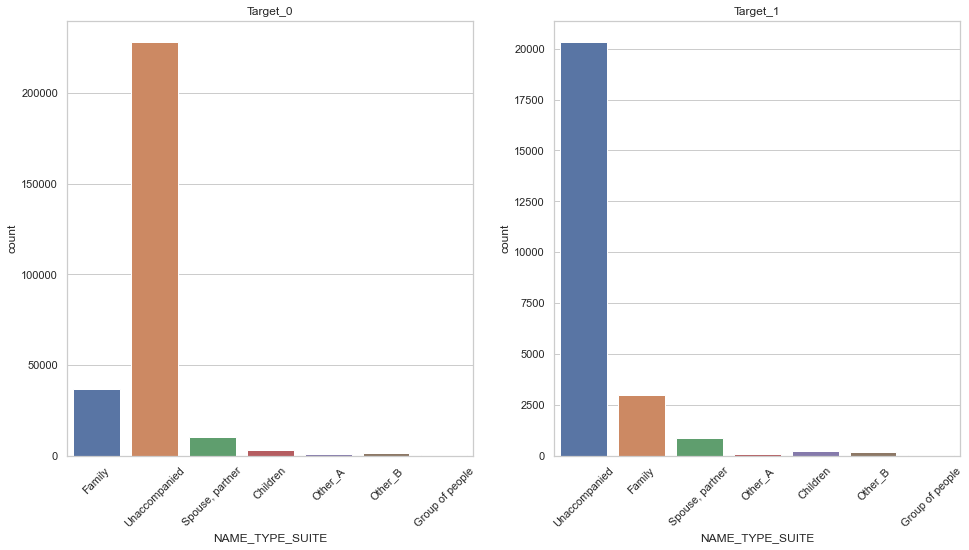

In [54]:
# Univariate analysis for "NAME_TYPE_SUITE" column.

plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
sns.countplot(Target_0['NAME_TYPE_SUITE'])
plt.title("Target_0")
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.countplot(Target_1['NAME_TYPE_SUITE'])
plt.title("Target_1")
plt.xticks(rotation = 45)
plt.show()

Observation :-

1. In both Target_0 and Target_1 has client 'Unaccompanied' when client applying for the loan.

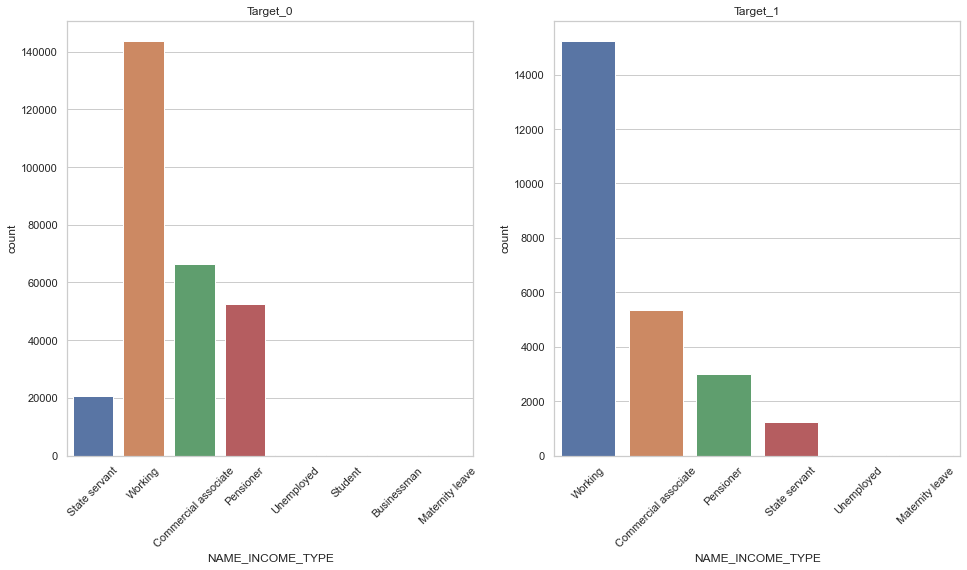

In [55]:
# Univariate analysis for "NAME_INCOME_TYPE" column.

plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
sns.countplot(Target_0['NAME_INCOME_TYPE'])
plt.title("Target_0")
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.countplot(Target_1['NAME_INCOME_TYPE'])
plt.title("Target_1")
plt.xticks(rotation = 45)
plt.show()

Observation :-

1. Target_0 and Target_1 both has more number of clients income type as 'Working'. followed by 'Commercial associate'.

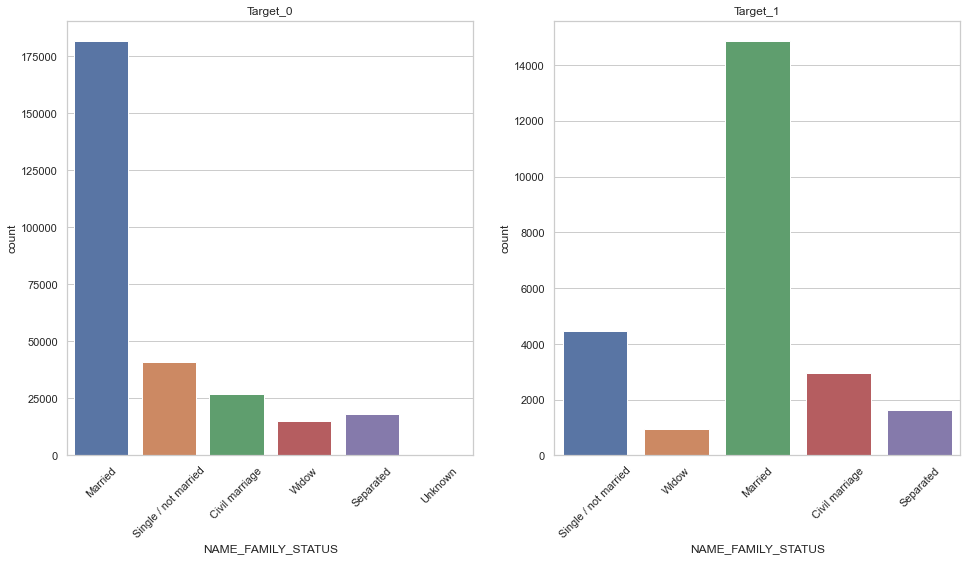

In [56]:
# Univariate analysis for "NAME_FAMILY_STATUS" column.

plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
sns.countplot(Target_0['NAME_FAMILY_STATUS'])
plt.title("Target_0")
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.countplot(Target_1['NAME_FAMILY_STATUS'])
plt.title("Target_1")
plt.xticks(rotation = 45)
plt.show()

Observation :-

1. Target_0 and Target_1 both has maximum number of clients with Family status as "Married"
2. Target_0 has more number of Clients with family status as "Married" as compare to Target_1.

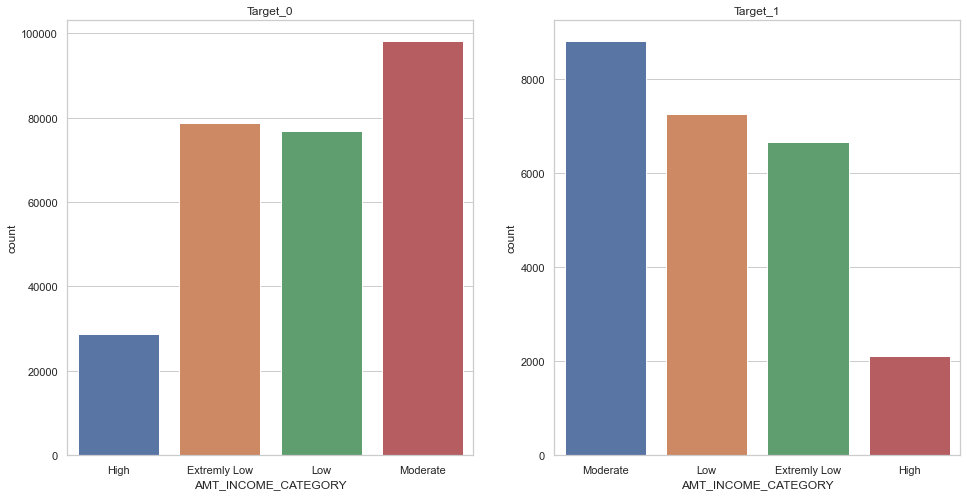

In [57]:
# Univariate analysis for "AMT_INCOME_CATEGORY" column.

plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
sns.countplot(Target_0['AMT_INCOME_CATEGORY'])
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(Target_1['AMT_INCOME_CATEGORY'])
plt.title("Target_1")
plt.show()

Observation :-

1. Target_0 and Target_1 has maximum number clients income as 'Moderate'.
2. As compare to Target_1 the Target_0 clients has more salary in 'Moderate' category.

### 4.4. Find correlation for numerical columns for both the cases ie. 0 and 1

### 4.4.1. Find Correlation for numerical columns for TARGET_0.

In [58]:
# Find the correlation of Target_0.

correlation_of_Target_0 = Target_0.corr()

In [59]:
# Check the result.

correlation_of_Target_0

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.000000,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,0.001589,0.000309,0.000998
AMT_INCOME_TOTAL,0.001739,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.139598,-0.072401,0.041338
AMT_CREDIT,-0.000342,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.129140,0.036085,0.069540
AMT_ANNUITY,0.000068,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.126615,0.028051,0.062013
AMT_GOODS_PRICE,-0.000205,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.135694,0.038908,0.071373
REGION_POPULATION_RELATIVE,0.000360,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,0.198493,-0.012486,0.041164
DAYS_BIRTH,0.001346,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,0.078158,0.197287,0.076509
DAYS_EMPLOYED,0.001744,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.028530,0.111995,-0.023379
DAYS_REGISTRATION,0.001475,-0.064937,-0.013477,-0.039436,-0.015916,0.052083,0.333151,0.214511,1.000000,0.100236,0.052503,0.103476,0.053533
DAYS_ID_PUBLISH,0.000077,-0.022896,0.001464,-0.014113,0.003649,0.001071,0.271314,0.276663,0.100236,1.000000,0.041703,0.124715,0.082948


In [60]:
# Use np.triu method to get the upper matrix values in correlation matrix and remove duplicate values.

correlation_of_Target_0_matrix = correlation_of_Target_0.where(np.triu(np.ones(correlation_of_Target_0.shape), k = 1).astype(np.bool)).unstack().reset_index()

In [61]:
# Create dataframe of above matrix result.

correlation_of_Target_0_matrix.columns = ['Variable_1', 'Variable_2', 'Correlation']
correlation_of_Target_0_matrix

,Variable_1,Variable_2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
2,SK_ID_CURR,AMT_CREDIT,NaN
3,SK_ID_CURR,AMT_ANNUITY,NaN
4,SK_ID_CURR,AMT_GOODS_PRICE,NaN
...,...,...,...
164,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,0.053533
165,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,0.082948
166,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.188399
167,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_3,0.067497


In [62]:
# Drop the null values.

correlation_of_Target_0_matrix.dropna(subset = ['Correlation'], inplace = True)

In [63]:
# Use abs() function to convert negative correlation value into positive and put all values in 'Abs_Correlation' column.

correlation_of_Target_0_matrix['Abs_Correlation'] = correlation_of_Target_0_matrix['Correlation'].abs()

In [64]:
# Sort the values based on Abs_Correlation.

correlation_of_Target_0_matrix.sort_values(by = ['Abs_Correlation'], ascending = False, inplace = True)

In [65]:
# Check the result. get the top 10 correlated columns.

correlation_of_Target_0_matrix.head(10)

,Variable_1,Variable_2,Correlation,Abs_Correlation
54,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
55,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
41,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
97,DAYS_EMPLOYED,DAYS_BIRTH,0.626114,0.626114
40,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
53,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
27,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
110,DAYS_REGISTRATION,DAYS_BIRTH,0.333151,0.333151
124,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663,0.276663
123,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314,0.271314


### 4.4.2. Find Correlation for numerical columns for TARGET_1.

In [66]:
# Find the correlation of Target_1.

correlation_of_Target_1 = Target_1.corr()

In [67]:
# Check the result.

correlation_of_Target_1

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.000000,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,0.001254,-0.005161,-0.006342,0.002539,0.006452,-0.008178,-0.002455
AMT_INCOME_TOTAL,-0.010165,1.000000,0.038131,0.046421,0.037583,0.009135,-0.003096,-0.014977,-0.000158,0.004215,0.007154,-0.015110,0.002429
AMT_CREDIT,-0.001290,0.038131,1.000000,0.752195,0.983103,0.069161,0.135316,0.001930,0.025854,0.052329,0.120848,0.077698,0.110851
AMT_ANNUITY,-0.007578,0.046421,0.752195,1.000000,0.752699,0.071690,0.014303,-0.081207,-0.034279,0.016767,0.116305,0.041415,0.079870
AMT_GOODS_PRICE,-0.001816,0.037583,0.983103,0.752699,1.000000,0.076049,0.135810,0.006642,0.025679,0.056086,0.131184,0.078754,0.118303
REGION_POPULATION_RELATIVE,0.006301,0.009135,0.069161,0.071690,0.076049,1.000000,0.048190,0.015532,0.056222,0.015537,0.169751,-0.009810,0.055139
DAYS_BIRTH,0.001254,-0.003096,0.135316,0.014303,0.135810,0.048190,1.000000,0.582185,0.289114,0.252863,0.108662,0.171621,0.111199
DAYS_EMPLOYED,-0.005161,-0.014977,0.001930,-0.081207,0.006642,0.015532,0.582185,1.000000,0.192455,0.229090,0.001100,0.096229,0.001402
DAYS_REGISTRATION,-0.006342,-0.000158,0.025854,-0.034279,0.025679,0.056222,0.289114,0.192455,1.000000,0.096833,0.069996,0.086099,0.071727
DAYS_ID_PUBLISH,0.002539,0.004215,0.052329,0.016767,0.056086,0.015537,0.252863,0.229090,0.096833,1.000000,0.059814,0.128268,0.123951


In [68]:
# Use np.triu method to get the upper matrix values in correlation matrix and remove duplicate values.

correlation_of_Target_1_matrix = correlation_of_Target_1.where(np.triu(np.ones(correlation_of_Target_1.shape), k = 1).astype(np.bool)).unstack().reset_index()

In [69]:
# Create dataframe of above matrix result.

correlation_of_Target_1_matrix.columns = ['Variable_1', 'Variable_2', 'Correlation']
correlation_of_Target_1_matrix

,Variable_1,Variable_2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
2,SK_ID_CURR,AMT_CREDIT,NaN
3,SK_ID_CURR,AMT_ANNUITY,NaN
4,SK_ID_CURR,AMT_GOODS_PRICE,NaN
...,...,...,...
164,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,0.071727
165,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,0.123951
166,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.207900
167,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_3,0.065142


In [70]:
# Drop the null values.

correlation_of_Target_1_matrix.dropna(subset = ['Correlation'], inplace = True)

In [71]:
# Use abs() function to convert negative correlation value into positive and put all values in 'Abs_Correlation' column.

correlation_of_Target_1_matrix['Abs_Correlation'] = correlation_of_Target_1_matrix['Correlation'].abs()

In [72]:
# Sort the values based on Abs_Correlation.

correlation_of_Target_1_matrix.sort_values(by = ['Abs_Correlation'], ascending = False, inplace = True)

In [73]:
# Check the result. get the top 10 correlated columns.

correlation_of_Target_1_matrix.head(10)

,Variable_1,Variable_2,Correlation,Abs_Correlation
54,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
55,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
41,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
97,DAYS_EMPLOYED,DAYS_BIRTH,0.582185,0.582185
110,DAYS_REGISTRATION,DAYS_BIRTH,0.289114,0.289114
123,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863,0.252863
124,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
166,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.207900,0.207900
111,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
149,EXT_SOURCE_3,DAYS_BIRTH,0.171621,0.171621


### 4.5. Check the variables with highest correlation are the same in both files or not.

 Top columns with high value of correlation in Target_1 are:
 
 1. AMT_GOODS_PRICE = AMT_CREDIT
 2. AMT_GOODS_PRICE = AMT_ANNUITY
 3. AT_ANNUITY = AMT_CREDIT
 

 Top columns with high value of correlation in Target_0 are:
 
 1. AMT_GOODS_PRICE = AMT_CREDIT
 2. AMT_GOODS_PRICE = AMT_ANNUITY
 3. AT_ANNUITY = AMT_CREDIT
 
 So, both Target_0 and Target_1 has same correlation variables.
 

### 4.6. Perform Univariate analysis for numerical variables for both 0 and 1. Compare the target variable across categories of continous variables.

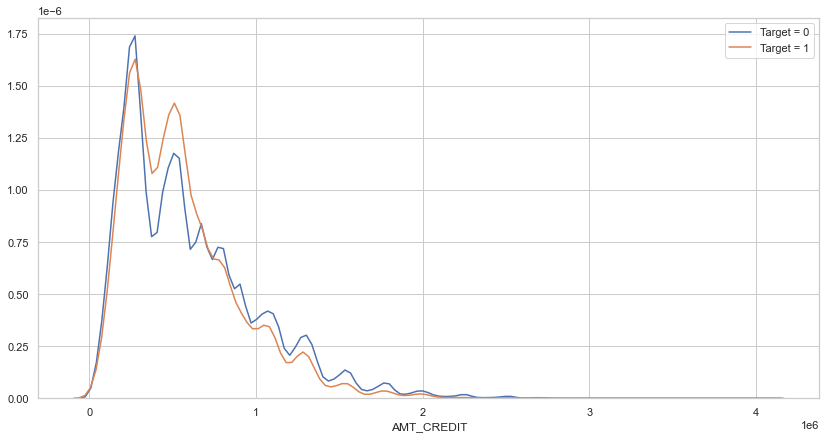

In [74]:
# Univariate analysis for "AMT_CREDIT" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(Target_0['AMT_CREDIT'], hist = False, label = "Target = 0")
sns.distplot(Target_1['AMT_CREDIT'], hist = False, label = "Target = 1")
plt.show()

Observation :-

1. Both the Target_0 and Target_1 clients has approximate same credit amount of loan.

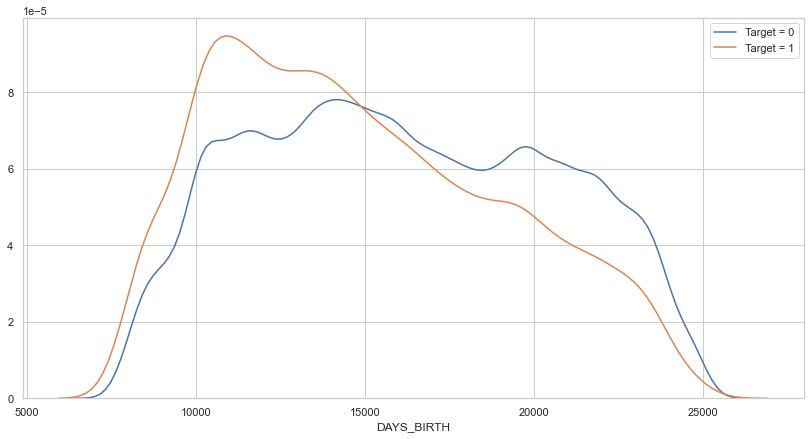

In [75]:
# Univariate analysis for "DAYS_BIRTH" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(Target_0['DAYS_BIRTH'], hist = False, label = "Target = 0")
sns.distplot(Target_1['DAYS_BIRTH'], hist = False, label = "Target = 1")
plt.show()

Observation :-

1. Target_0 has more number of clients in Younger age and less clients as age get increases.
2. Target_1 has clients in evry age group.

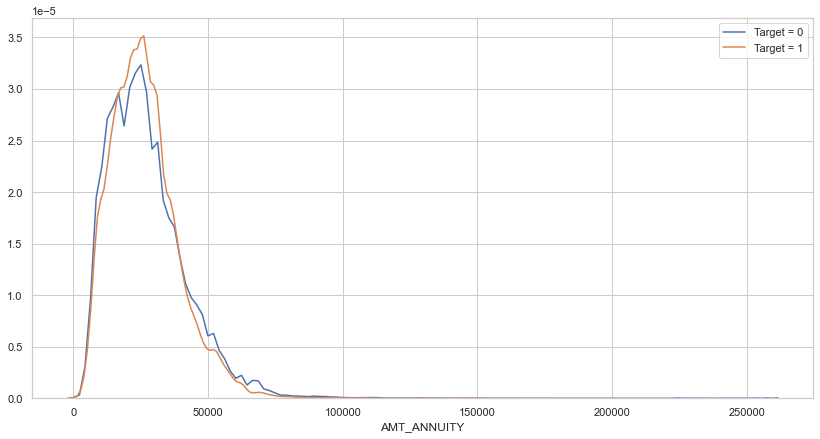

In [76]:
# Univariate analysis for "AMT_ANNUITY" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(Target_0['AMT_ANNUITY'], hist = False, label = "Target = 0")
sns.distplot(Target_1['AMT_ANNUITY'], hist = False, label = "Target = 1")
plt.show()

Observation :-

1. Target_1 clients has more amount of fixed sum money as compare to Target_0.

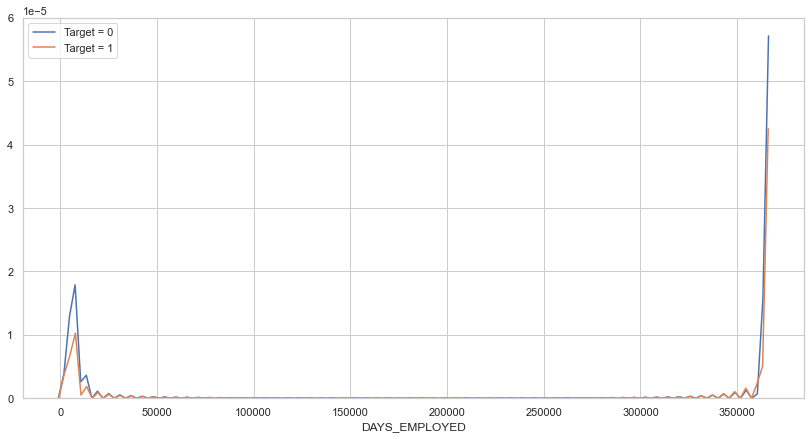

In [77]:
# Univariate analysis for "DAYS_EMPLOYED" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(Target_0['DAYS_EMPLOYED'], hist = False, label = "Target = 0")
sns.distplot(Target_1['DAYS_EMPLOYED'], hist = False, label = "Target = 1")
plt.show()

Observation :-

1. There are some invalid age of clients like more than 350000.
2. Some other invalid ages like near to 0. 

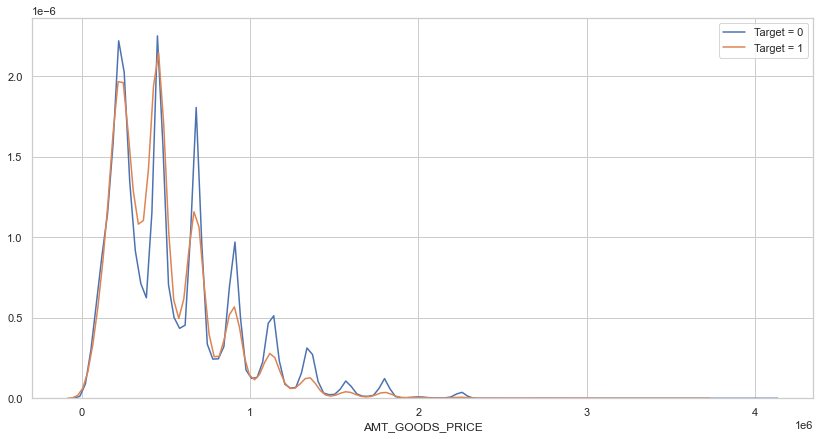

In [78]:
# Univariate analysis for "AMT_GOODS_PRICE" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(Target_0['AMT_GOODS_PRICE'], hist = False, label = "Target = 0")
sns.distplot(Target_1['AMT_GOODS_PRICE'], hist = False, label = "Target = 1")
plt.show()

Observation :-

1. Target_0 has high number of the price of the goods for which the loan is given.
2. Target_1 has less number of the price of the goods for which the loan is given.

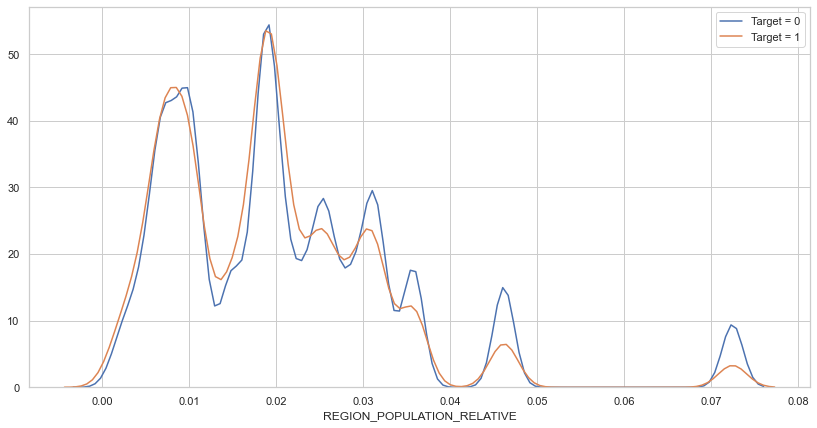

In [79]:
# Univariate analysis for "REGION_POPULATION_RELATIVE" continous variable.

plt.figure(figsize = (14, 7))
sns.distplot(Target_0['REGION_POPULATION_RELATIVE'], hist = False, label = "Target = 0")
sns.distplot(Target_1['REGION_POPULATION_RELATIVE'], hist = False, label = "Target = 1")
plt.show()

Observation :-

1. Target_0 clients lives in more populated areas as compare to Target_1. Target_0 has high number of normalized popuation of region.
(higher number means the client lives in more populated region) 

### 4.7. Perform Bivariate Analysis. 

### 4.7.1. Bivariate Analysis for Continous - Continous variables.

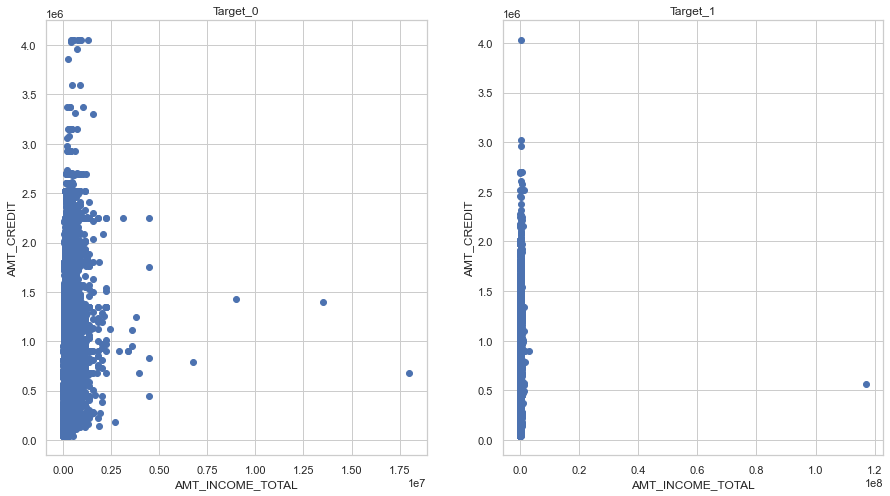

In [80]:
# Bivariate analysis for "AMT_INCOME_TOTAL", "AMT_CREDIT" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.scatter(Target_0["AMT_INCOME_TOTAL"], Target_0["AMT_CREDIT"])
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.title("Target_0")

plt.subplot(1, 2, 2)
plt.scatter(Target_1["AMT_INCOME_TOTAL"], Target_1["AMT_CREDIT"])
plt.title("Target_1")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.show()

Observation :-

1. Target_0 and Target_1 both has independent based on credit amount of loan.
2. There is no dependancy in credit amount of loan and income of client.
3. Credit amount of loan varies even if the income of client is same.

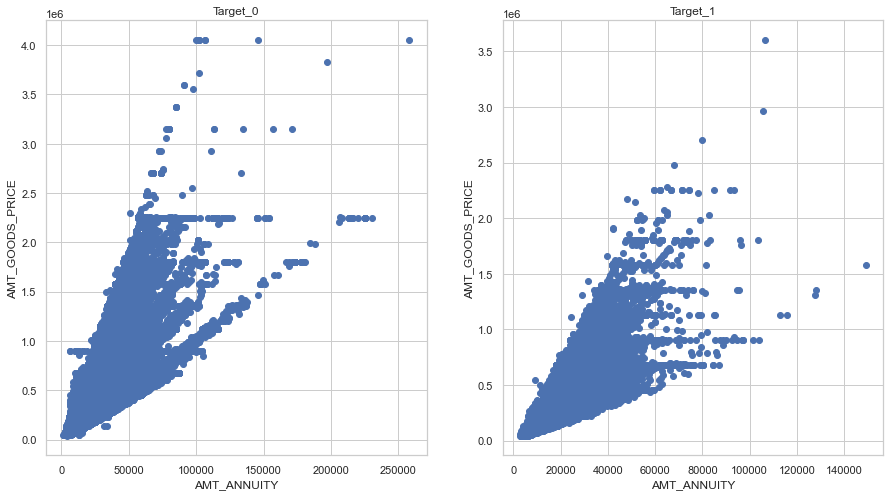

In [81]:
# Bivariate analysis for "AMT_ANNUITY" "AMT_GOODS_PRICE" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.scatter(Target_0["AMT_ANNUITY"], Target_0["AMT_GOODS_PRICE"])
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("Target_0")

plt.subplot(1, 2, 2)
plt.scatter(Target_1["AMT_ANNUITY"], Target_1["AMT_GOODS_PRICE"])
plt.title("Target_1")
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_GOODS_PRICE")
plt.show()

Observation :-

1. Target_0 has dependacy between the consumer loans price of the goods for which the loan is given and loan annuity.
2. In Target_0 as the price of goods for which loan is given increases then the loan annuity also increases.
3. Target_1 also has same relation between loan annuity and goods price for which loan is given
4. In Target_1 as the loan annuity increases the goods price for loan is also given.

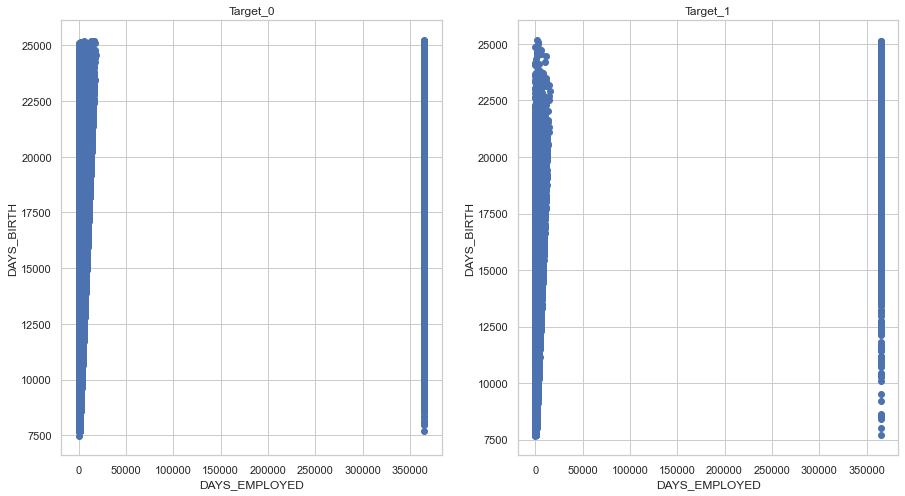

In [82]:
# Bivariate analysis for "DAYS_EMPLOYED" "DAYS_BIRTH" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.scatter(Target_0["DAYS_EMPLOYED"], Target_0["DAYS_BIRTH"])
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("DAYS_BIRTH")
plt.title("Target_0")

plt.subplot(1, 2, 2)
plt.scatter(Target_1["DAYS_EMPLOYED"], Target_1["DAYS_BIRTH"])
plt.title("Target_1")
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("DAYS_BIRTH")
plt.show()

Observation :-

1. Target_0 and Target_1 has some invalid age relation as it contains clients age grater than 350000 and around 0.
2. Target_0 and Target_1 has no relation in between clients age in days at the time of application and days before the application the person started current employment.

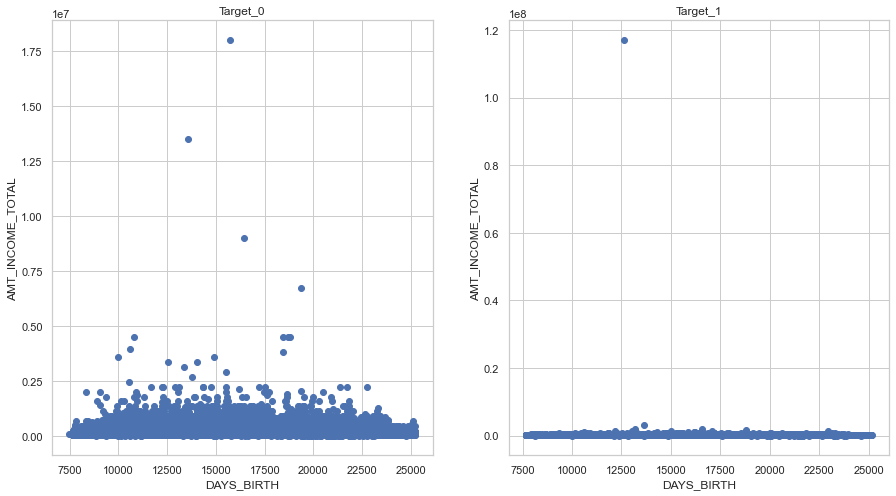

In [83]:
# Bivariate analysis for "DAYS_BIRTH" "AMT_INCOME_TOTAL" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.scatter(Target_0["DAYS_BIRTH"], Target_0["AMT_INCOME_TOTAL"])
plt.xlabel("DAYS_BIRTH")
plt.ylabel("AMT_INCOME_TOTAL")
plt.title("Target_0")

plt.subplot(1, 2, 2)
plt.scatter(Target_1["DAYS_BIRTH"], Target_1["AMT_INCOME_TOTAL"])
plt.title("Target_1")
plt.xlabel("DAYS_BIRTH")
plt.ylabel("AMT_INCOME_TOTAL")
plt.show()

Observation :-

1. Target_0 has relation between Clients age in days at the time of application and income of client. as the clients age increases the income of client is also varies.
2. Target_ has no relation between clients age at the time of application and income of client. as clients age increases the income of client stays constant.

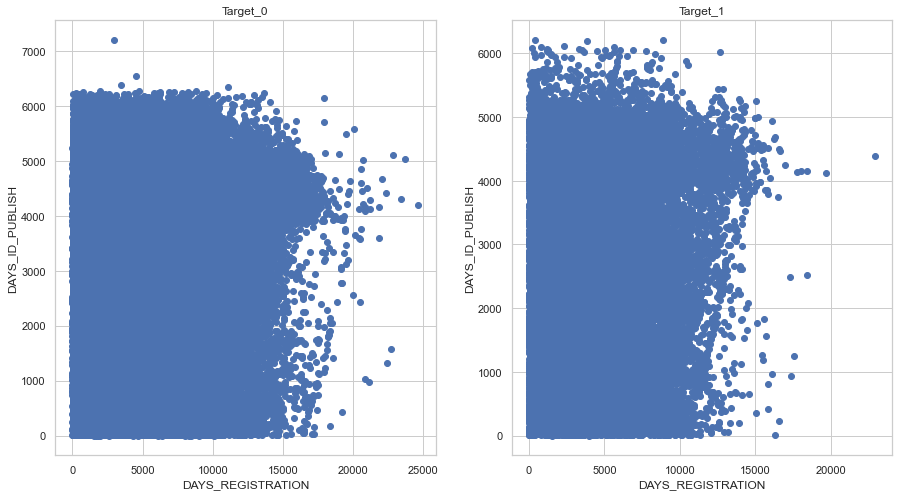

In [84]:
# Bivariate analysis for "DAYS_REGISTRATION" "DAYS_ID_PUBLISH" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.scatter(Target_0["DAYS_REGISTRATION"], Target_0["DAYS_ID_PUBLISH"])
plt.xlabel("DAYS_REGISTRATION")
plt.ylabel("DAYS_ID_PUBLISH")
plt.title("Target_0")

plt.subplot(1, 2, 2)
plt.scatter(Target_1["DAYS_REGISTRATION"], Target_1["DAYS_ID_PUBLISH"])
plt.title("Target_1")
plt.xlabel("DAYS_REGISTRATION")
plt.ylabel("DAYS_ID_PUBLISH")
plt.show()

Observation :-

1. Some clients in Target_0 has relation as days before the application did client change the identity document with which he applied for the loan increases the days before the application did client change his registration also increases.
2. But for other clients in Target_0 has no relation in days id publish and days registration.
3. Target_1 client also has same relation between Days id publish and days registration.

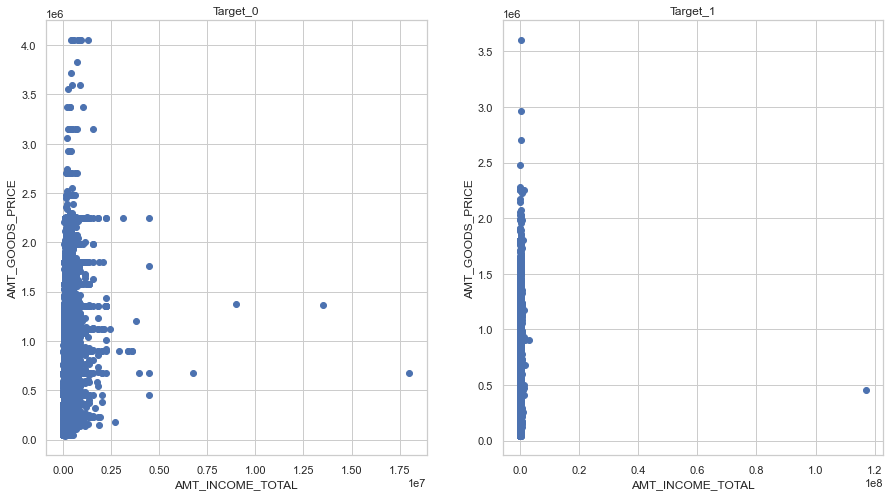

In [85]:
# Bivariate analysis for "AMT_INCOME_TOTAL" "AMT_GOODS_PRICE" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.scatter(Target_0["AMT_INCOME_TOTAL"], Target_0["AMT_GOODS_PRICE"])
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("Target_0")

plt.subplot(1, 2, 2)
plt.scatter(Target_1["AMT_INCOME_TOTAL"], Target_1["AMT_GOODS_PRICE"])
plt.title("Target_1")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_GOODS_PRICE")
plt.show()

Observation :-

1. Some clients in Target_0 has a relationship as consumer loans price of the goods for which the loan is given increases the income of client also has high value.
2. But in Target_1 clients as the consumer loans price of the goods for which the loan is given increases the income of client does not varies. income of client doesnt change.

### 4.7.2. Bivariate Analysis for Continous - Categorical variables.

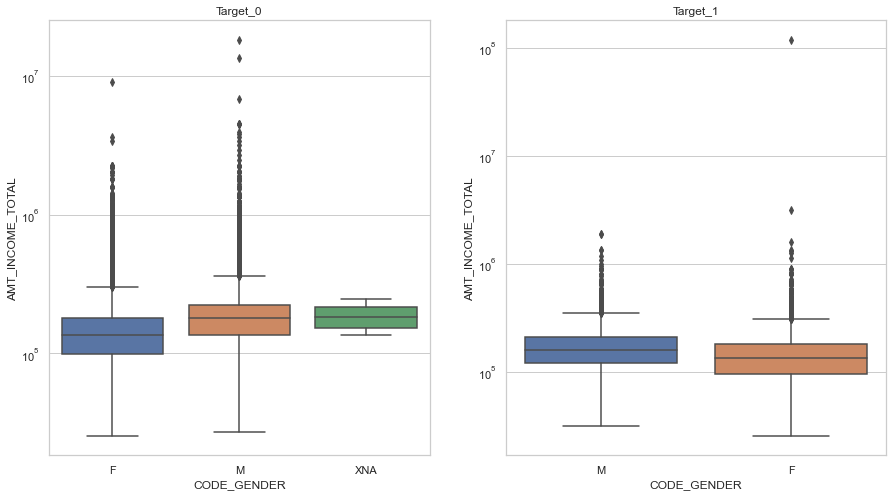

In [86]:
# Bivariate analysis for "CODE_GENDER" "AMT_INCOME_TOTAL" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x = "CODE_GENDER", y = "AMT_INCOME_TOTAL", data = Target_0)
plt.xlabel("CODE_GENDER")
plt.ylabel("AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.boxplot(x = "CODE_GENDER", y = "AMT_INCOME_TOTAL", data = Target_1)
plt.xlabel("CODE_GENDER")
plt.ylabel("AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target_1")
plt.show() 

Observation :-

1. In Target_0 the income of some Male clients is higher than Female clients. and Target_0 also has some clients as XNA.
2. Target_1 also has salary of some male clients higher than some female clients.
3. Both Target_0 and Target_1 has the outliers above the maximum IQR.

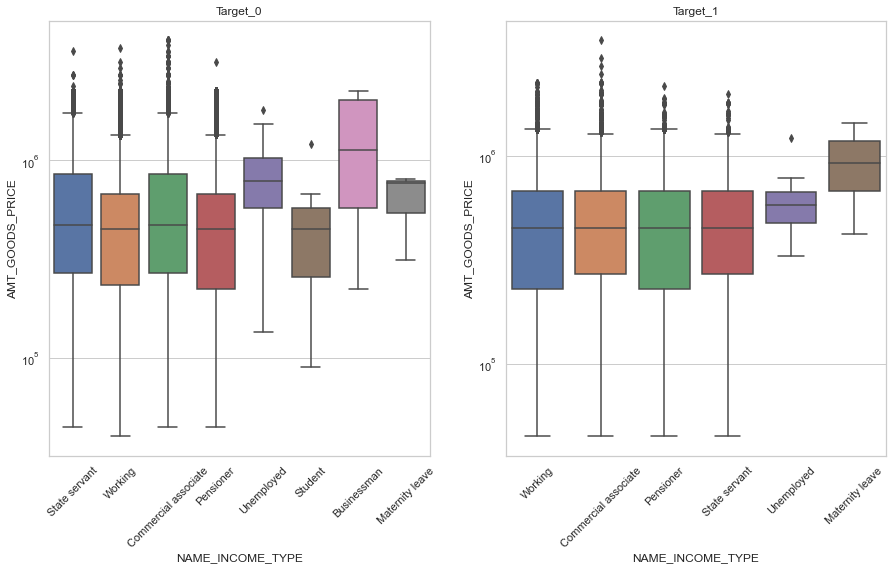

In [87]:
# Bivariate analysis for "NAME_INCOME_TYPE" "AMT_GOODS_PRICE" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x = "NAME_INCOME_TYPE", y = "AMT_GOODS_PRICE", data = Target_0)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("AMT_GOODS_PRICE")
plt.yscale('log')
plt.xticks(rotation = 45)
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.boxplot(x = "NAME_INCOME_TYPE", y = "AMT_GOODS_PRICE", data = Target_1)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("AMT_GOODS_PRICE")
plt.yscale('log')
plt.xticks(rotation = 45)
plt.title("Target_1")
plt.show() 

Observation :-

1. In Target_0 clients with income type as Bussinessman has maximum consumer loans price of goods for which the loan is given, so its higher chances that the clients have income type as Bussinessman has more probability than other to be defaulter.
2. In Target_1 clients with all income type has same range of goods price but only for income type as maternity leave has higher goods price. the clients with maternity leave has more chances to no pay the loan.
3. The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

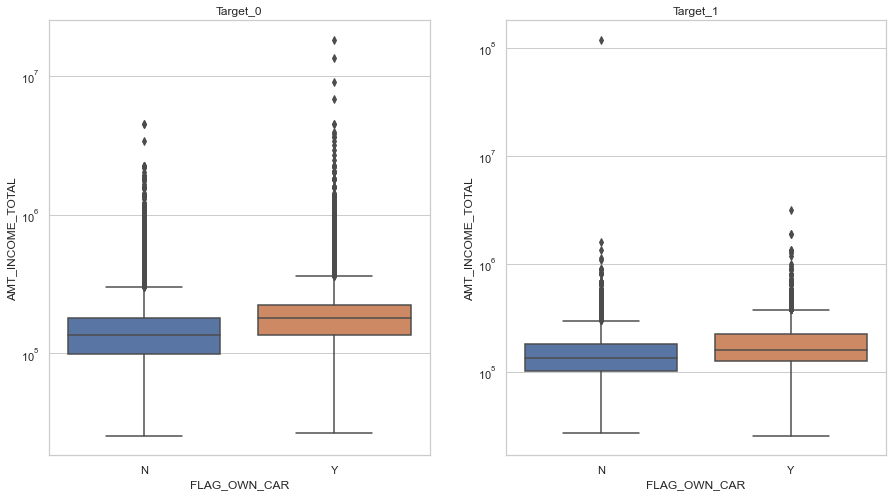

In [141]:
# Bivariate analysis for "FLAG_OWN_CAR" "AMT_INCOME_TOTAL" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x = "FLAG_OWN_CAR", y = "AMT_INCOME_TOTAL", data = Target_0)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.boxplot(x = "FLAG_OWN_CAR", y = "AMT_INCOME_TOTAL", data = Target_1)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("AMT_INCOME_TOTAL")
plt.yscale('log')
plt.title("Target_1")
plt.show() 

Observation :-

1. The clients that owns a car are almost a half of the ones that doesn't own one. The clients that owns a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%.
2. In Target_0 and Target_1 both has ouliers.
3. There are more likely to client have a car if client has high salary.

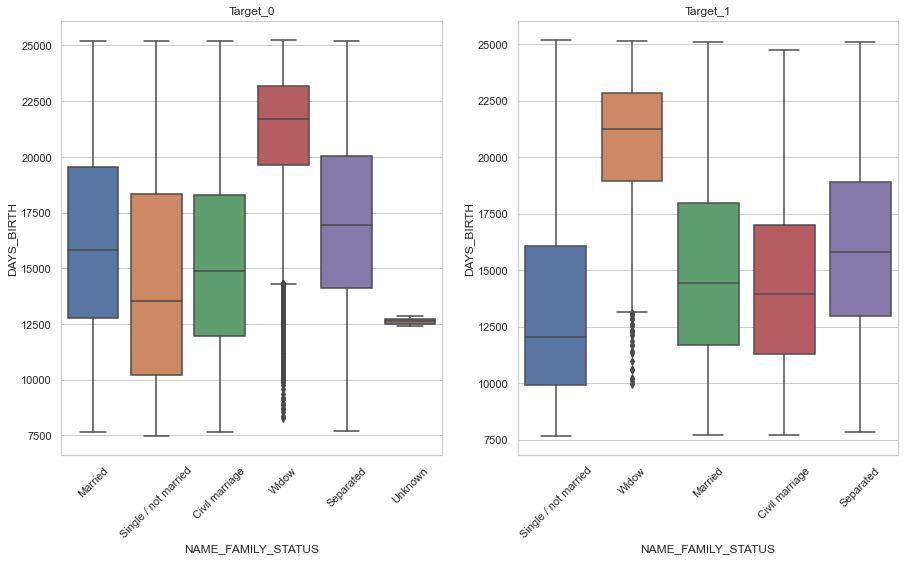

In [89]:
# Bivariate analysis for "NAME_FAMILY_STATUS" "DAYS_BIRTH" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x = "NAME_FAMILY_STATUS", y = "DAYS_BIRTH", data = Target_0)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("DAYS_BIRTH")
plt.xticks(rotation = 45)
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.boxplot(x = "NAME_FAMILY_STATUS", y = "DAYS_BIRTH", data = Target_1)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("DAYS_BIRTH")
plt.xticks(rotation = 45)
plt.title("Target_1")
plt.show() 

Observation :-

1. All family status varies in age but olnly fammily status "widow" has a  almost same age group in both Target_0 and Target_1
2. In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest

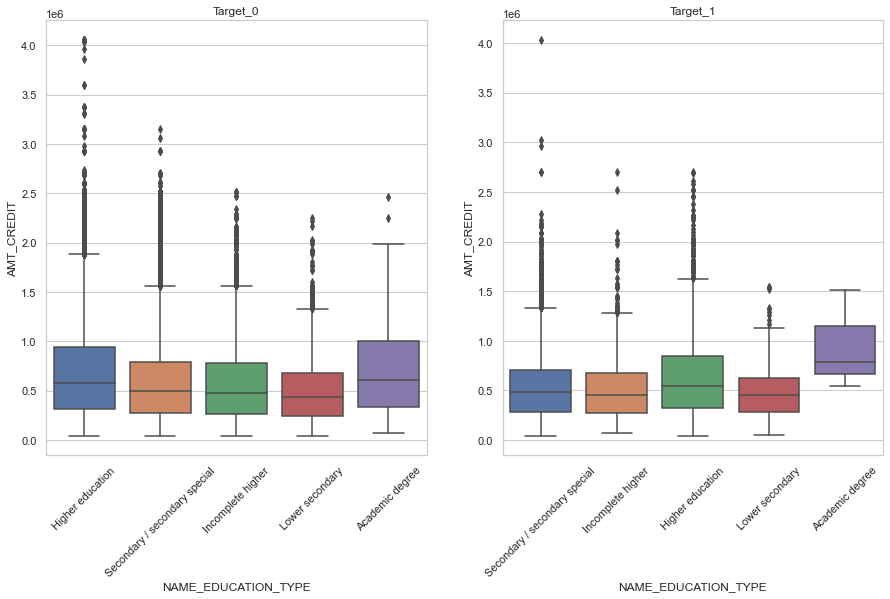

In [90]:
# Bivariate analysis for "NAME_EDUCATION_TYPE" "AMT_CREDIT" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = "AMT_CREDIT", data = Target_0)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation = 45)
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.boxplot(x = "NAME_EDUCATION_TYPE", y = "AMT_CREDIT", data = Target_1)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation = 45)
plt.title("Target_1")
plt.show() 

Observation :-

1. In both Target_0 and Target_1 the clients has education type as Academic degree has higher chances to get more acredit amount of loan.
2. Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.
3. The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.


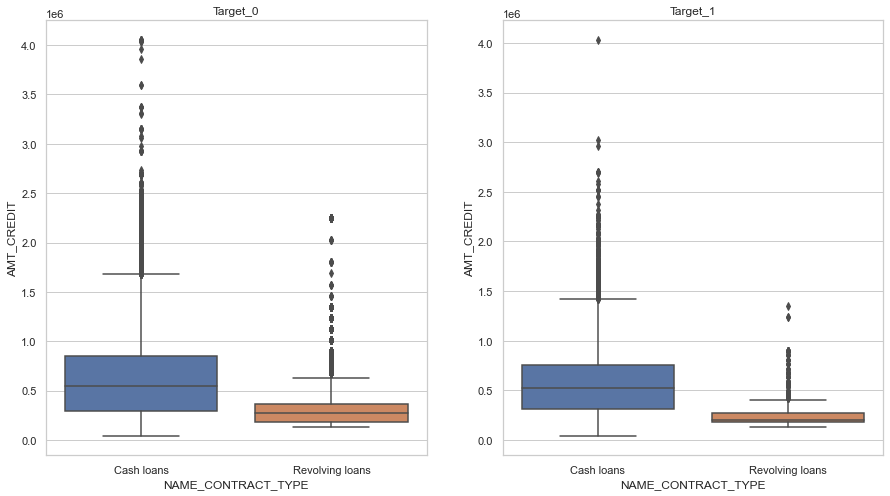

In [91]:
# Bivariate analysis for "NAME_CONTRACT_TYPE" "AMT_CREDIT" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = "AMT_CREDIT", data = Target_0)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = "AMT_CREDIT", data = Target_1)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.title("Target_1")
plt.show() 

Observation :-

1. Both the Target_0 and Target_1 has more more clients which requires the Cash loans with high credit amount of loan as compare to the amount of revolving loans.
2. Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

### 4.7.3. Bivariate Analysis for Categorical - Categorical variables.

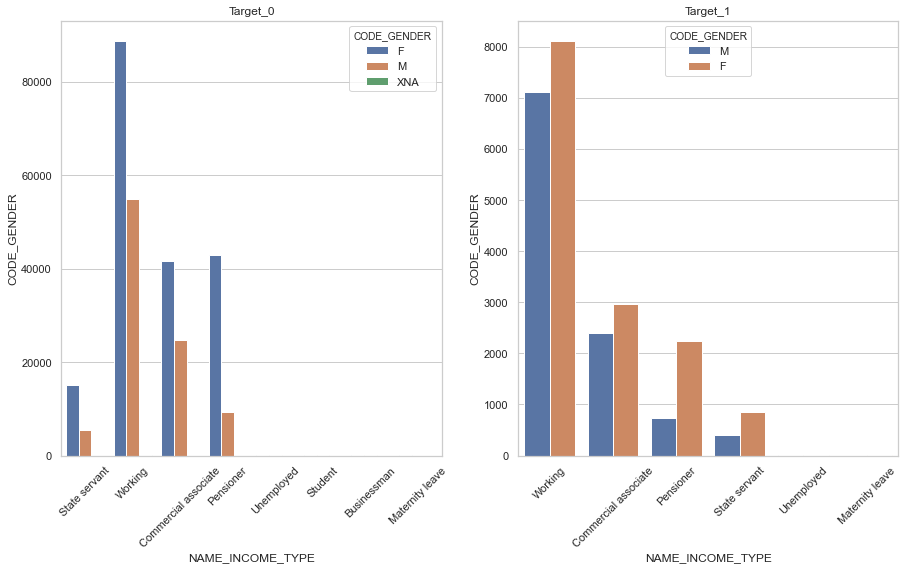

In [92]:
# Bivariate analysis for "NAME_INCOME_TYPE" "CODE_GENDER" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x = "NAME_INCOME_TYPE", hue = "CODE_GENDER", data = Target_0)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("CODE_GENDER")
plt.xticks(rotation = 45)
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(x = "NAME_INCOME_TYPE", hue = "CODE_GENDER", data = Target_1)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("CODE_GENDER")
plt.title("Target_1")
plt.xticks(rotation = 45)
plt.show() 

Observation :-

1. In Target_0 and Target_1 both has maximum clients with income type as working. 
2. Most of applicants for loans are getting income from Working sector, followed by Commercial associate, Pensioner and State servant.
3. The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

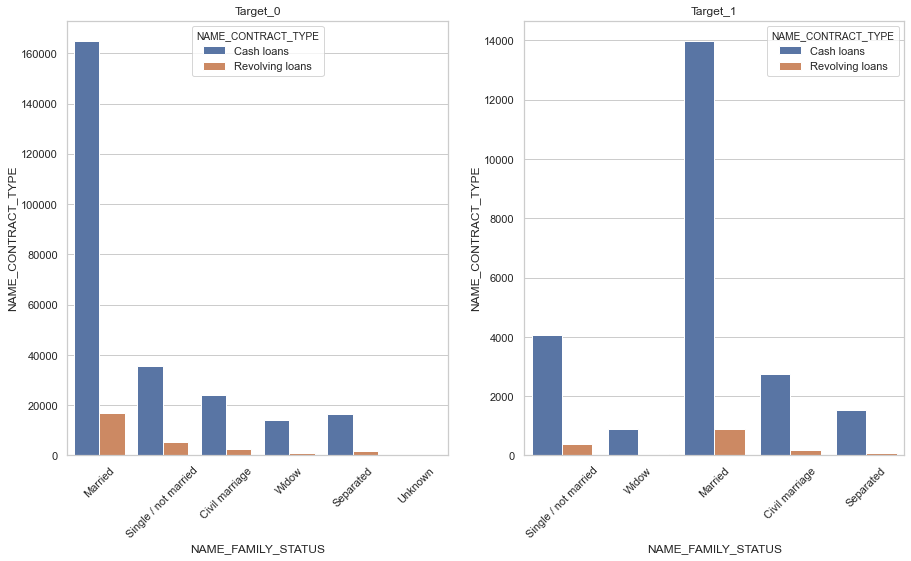

In [93]:
# Bivariate analysis for "NAME_FAMILY_STATUS" "NAME_CONTRACT_TYPE" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "NAME_CONTRACT_TYPE", data = Target_0)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.xticks(rotation = 45)
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(x = "NAME_FAMILY_STATUS", hue = "NAME_CONTRACT_TYPE", data = Target_1)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("Target_1")
plt.xticks(rotation = 45)
plt.show() 

Observation :-

1. The clients with family status as Married has very high percentage of client requesting cash loans.
2. Most of clients are married, followed by Single/not married and civil marriage.
3. In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest 

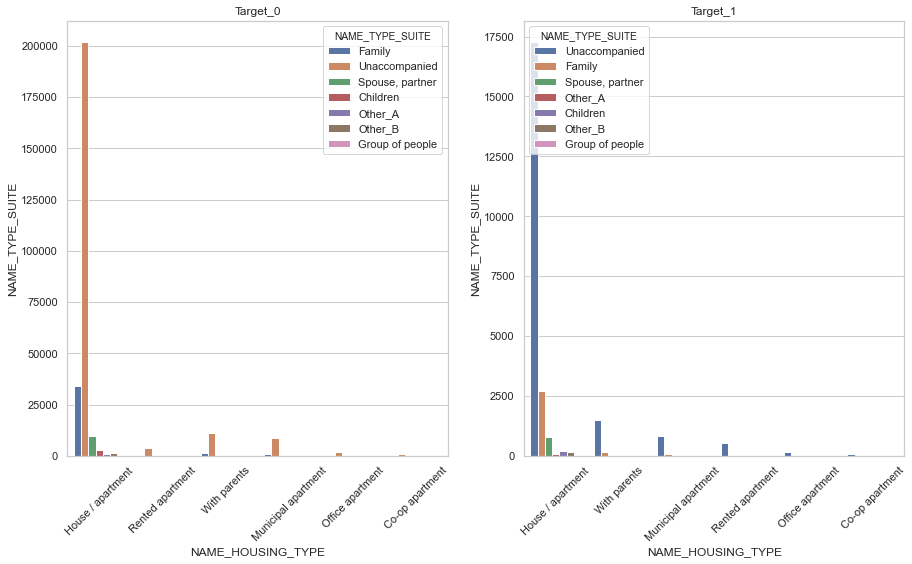

In [94]:
# Bivariate analysis for "NAME_HOUSING_TYPE" "NAME_TYPE_SUITE" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x = "NAME_HOUSING_TYPE", hue = "NAME_TYPE_SUITE", data = Target_0)
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("NAME_TYPE_SUITE")
plt.xticks(rotation = 45)
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(x = "NAME_HOUSING_TYPE", hue = "NAME_TYPE_SUITE", data = Target_1)
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("NAME_TYPE_SUITE")
plt.title("Target_1")
plt.xticks(rotation = 45)
plt.show() 

Observation :-

1. Maximum applicants has housing type as House/Apartment on both Target_0 and Target_1
2. From all Applicants with housing type as House/Apartment most applicant is unaccompanied.

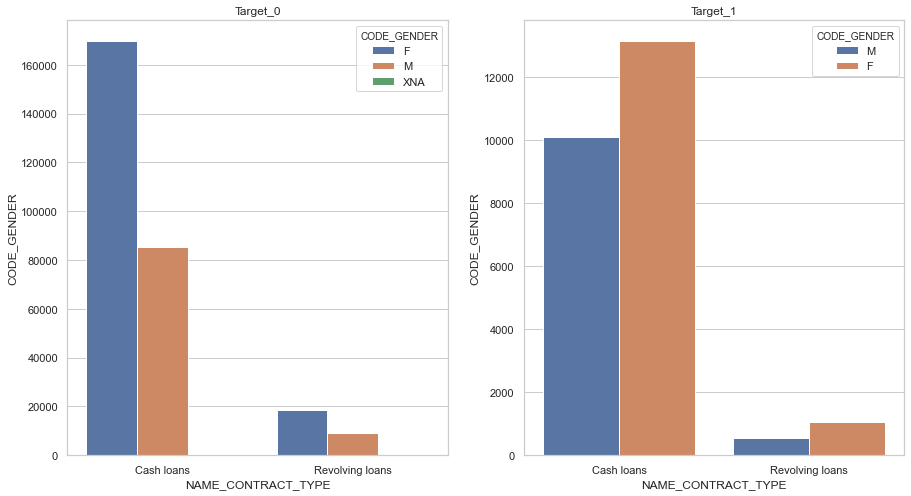

In [95]:
# Bivariate analysis for "NAME_CONTRACT_TYPE" "CODE_GENDER" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "CODE_GENDER", data = Target_0)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("CODE_GENDER")
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "CODE_GENDER", data = Target_1)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("CODE_GENDER")
plt.title("Target_1")
plt.show() 

Observation :-

1. In Target_0 and Target_1 both has maximum applicants with gender female in both cash loans and revolving loans as compare to applicants with gender male.
2. Contract type Revolving loans are just a small fraction from the total number of loans. in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

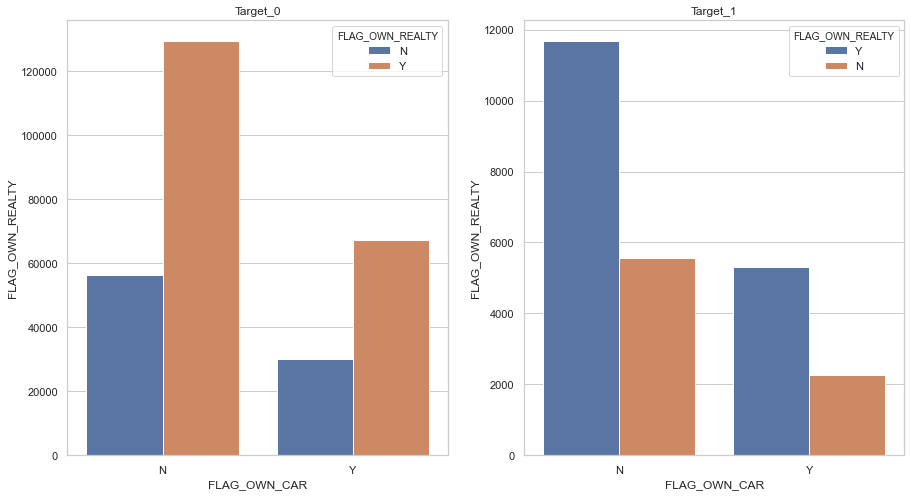

In [96]:
# Bivariate analysis for "FLAG_OWN_CAR" "FLAG_OWN_REALTY" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x = "FLAG_OWN_CAR", hue = "FLAG_OWN_REALTY", data = Target_0)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("FLAG_OWN_REALTY")
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(x = "FLAG_OWN_CAR", hue = "FLAG_OWN_REALTY", data = Target_1)
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("FLAG_OWN_REALTY")
plt.title("Target_1")
plt.show() 

Observation :-

1. The clients that owns a car are almost a half of the ones that doesn't own one. The clients that owns a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%.
2. The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

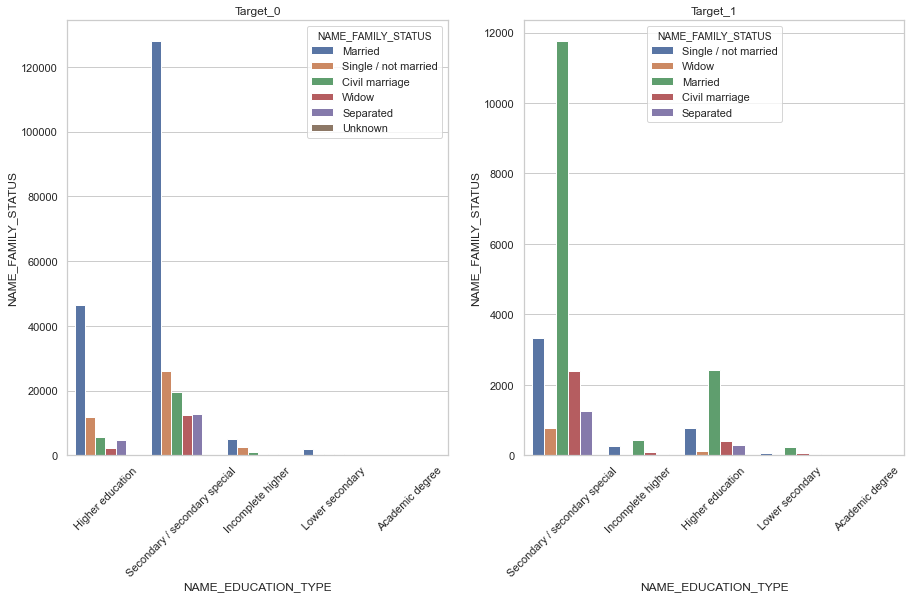

In [97]:
# Bivariate analysis for "NAME_EDUCATION_TYPE" "NAME_FAMILY_STATUS" variables.

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "NAME_FAMILY_STATUS", data = Target_0)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("NAME_FAMILY_STATUS")
plt.xticks(rotation = 45)
plt.title("Target_0")

plt.subplot(1, 2, 2)
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "NAME_FAMILY_STATUS", data = Target_1)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("NAME_FAMILY_STATUS")
plt.title("Target_1")
plt.xticks(rotation = 45)
plt.show() 

Observation :-


1. Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.
2. Majority of the clients have Secondary / secondary special education in which most of it has family status as Married in both Target_0 and Target_1
3. The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

### 5. Now Perform Analysis on previous_application.csv

In [98]:
# Import the dataset.

previous_data = pd.read_csv("C:\\Users\\Mohit'z\\Desktop\\Upgrad\\Credit Card EDA Case Study\\previous_application.csv")

In [99]:
# Check the structure of dataset.

previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Chekc the shape of dataset.

previous_data.shape

(1670214, 37)

In [101]:
# Understand the data.

previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [102]:
# Get count of unique values in each column in dataset.

previous_data.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

### 5.1. Checking Imbalance Percentage.

In [103]:
# Find imbanalce percentage.

100 * previous_data.NAME_CONTRACT_STATUS.value_counts(normalize = True)

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

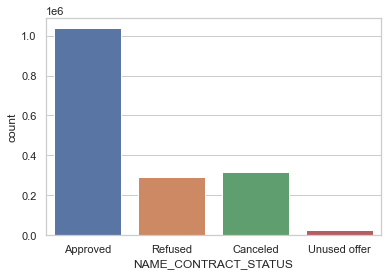

In [104]:
# Plot a graph to get visualize the percentage of imbalance values.

Count_for_NAME_CONTRACT_STATUS = sns.countplot("NAME_CONTRACT_STATUS", data = previous_data)
plt.show()

Since from above code and countplot we can calculate that it is Imbalance.
Where in NAME_CONTRACT_STATUS variable for value "Approved" it has 62.07% , for value "Refused" it is 18.93% ,
for value "Canceled" it is 17.40% and for value "Unused offer" it is 1.58%

### 5.2. Divide the dataset into NAME_CONTRACT_STATUS categories.

In [105]:
# Use 4 dataframe to divide the NAME_CONTRACT_STATUS variable

NAME_CONTRACT_STATUS_Approved = previous_data[previous_data.NAME_CONTRACT_STATUS == "Approved"]
NAME_CONTRACT_STATUS_Refused = previous_data[previous_data.NAME_CONTRACT_STATUS == "Refused"]
NAME_CONTRACT_STATUS_Canceled = previous_data[previous_data.NAME_CONTRACT_STATUS == "Canceled"]
NAME_CONTRACT_STATUS_Unused_offer = previous_data[previous_data.NAME_CONTRACT_STATUS == "Unused offer"]

In [106]:
# Understand the newly created dataframe "NAME_CONTRACT_STATUS_Approved"

NAME_CONTRACT_STATUS_Approved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036781 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1036781 non-null  int64  
 1   SK_ID_CURR                   1036781 non-null  int64  
 2   NAME_CONTRACT_TYPE           1036781 non-null  object 
 3   AMT_ANNUITY                  1036773 non-null  float64
 4   AMT_APPLICATION              1036781 non-null  float64
 5   AMT_CREDIT                   1036780 non-null  float64
 6   AMT_DOWN_PAYMENT             662381 non-null   float64
 7   AMT_GOODS_PRICE              993946 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1036781 non-null  object 
 9   HOUR_APPR_PROCESS_START      1036781 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1036781 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1036781 non-null  int64  
 12  RATE_DOWN_PAYMENT            662381 non-nu

In [107]:
# Understand the newly created dataframe "NAME_CONTRACT_STATUS_Canceled"

NAME_CONTRACT_STATUS_Canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316319 entries, 6 to 1670190
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   316319 non-null  int64  
 1   SK_ID_CURR                   316319 non-null  int64  
 2   NAME_CONTRACT_TYPE           316319 non-null  object 
 3   AMT_ANNUITY                  10514 non-null   float64
 4   AMT_APPLICATION              316319 non-null  float64
 5   AMT_CREDIT                   316319 non-null  float64
 6   AMT_DOWN_PAYMENT             643 non-null     float64
 7   AMT_GOODS_PRICE              10749 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   316319 non-null  object 
 9   HOUR_APPR_PROCESS_START      316319 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  316319 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       316319 non-null  int64  
 12  RATE_DOWN_PAYMENT            643 non-null     float64
 13

In [108]:
# Understand the newly created dataframe "NAME_CONTRACT_STATUS_Refused"

NAME_CONTRACT_STATUS_Refused.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290678 entries, 4 to 1670207
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   290678 non-null  int64  
 1   SK_ID_CURR                   290678 non-null  int64  
 2   NAME_CONTRACT_TYPE           290678 non-null  object 
 3   AMT_ANNUITY                  249780 non-null  float64
 4   AMT_APPLICATION              290678 non-null  float64
 5   AMT_CREDIT                   290678 non-null  float64
 6   AMT_DOWN_PAYMENT             87352 non-null   float64
 7   AMT_GOODS_PRICE              253573 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   290678 non-null  object 
 9   HOUR_APPR_PROCESS_START      290678 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  290678 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       290678 non-null  int64  
 12  RATE_DOWN_PAYMENT            87352 non-null   float64
 13

In [109]:
# Understand the newly created dataframe "NAME_CONTRACT_STATUS_Unused_offer"

NAME_CONTRACT_STATUS_Unused_offer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26436 entries, 41 to 1670196
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   26436 non-null  int64  
 1   SK_ID_CURR                   26436 non-null  int64  
 2   NAME_CONTRACT_TYPE           26436 non-null  object 
 3   AMT_ANNUITY                  912 non-null    float64
 4   AMT_APPLICATION              26436 non-null  float64
 5   AMT_CREDIT                   26436 non-null  float64
 6   AMT_DOWN_PAYMENT             23994 non-null  float64
 7   AMT_GOODS_PRICE              26431 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   26436 non-null  object 
 9   HOUR_APPR_PROCESS_START      26436 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  26436 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       26436 non-null  int64  
 12  RATE_DOWN_PAYMENT            23994 non-null  float64
 13  RATE_INTEREST

### 5.3. Perform the Univariate analysis for categorical variables.

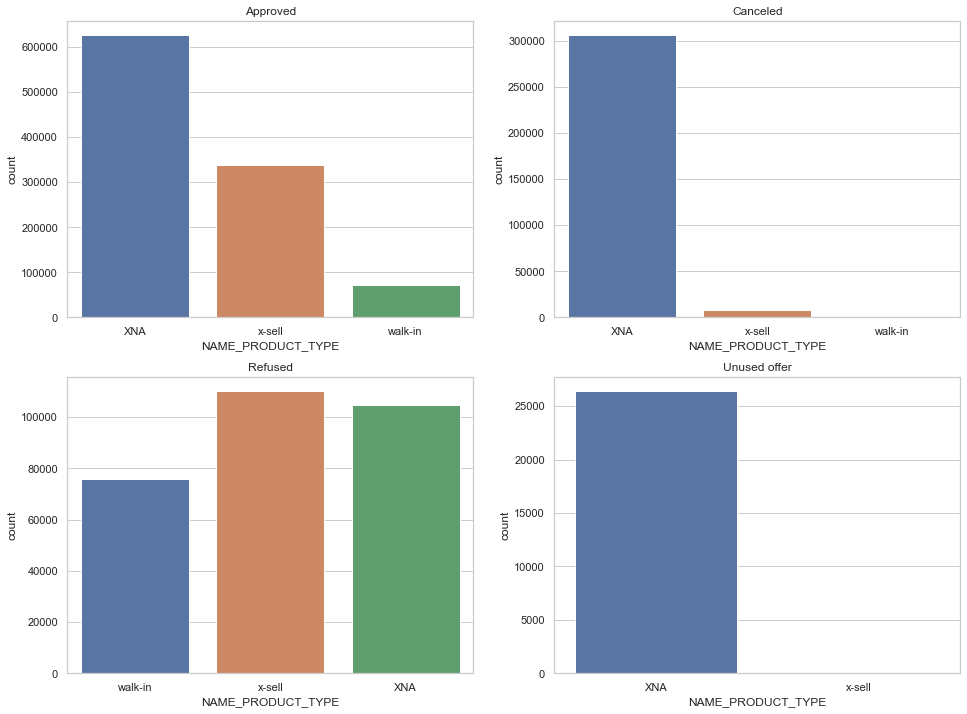

In [110]:
# Univariate analysis for "NAME_PRODUCT_TYPE" column.

plt.figure(figsize = (16, 12))
plt.subplot(2, 2, 1)
sns.countplot(NAME_CONTRACT_STATUS_Approved['NAME_PRODUCT_TYPE'])
plt.title("Approved")
plt.subplot(2, 2, 2)
sns.countplot(NAME_CONTRACT_STATUS_Canceled['NAME_PRODUCT_TYPE'])
plt.title("Canceled")
plt.subplot(2, 2, 3)
sns.countplot(NAME_CONTRACT_STATUS_Refused['NAME_PRODUCT_TYPE'])
plt.title("Refused")
plt.subplot(2, 2, 4)
sns.countplot(NAME_CONTRACT_STATUS_Unused_offer['NAME_PRODUCT_TYPE'])
plt.title("Unused offer")
plt.show()

Observation :-

1. Maximum approved application on previous application has product type as x-sell followed by walk-in
2. There are no canceled application for walk-in
3. Maximum number of application refused are belongs to x-sell category

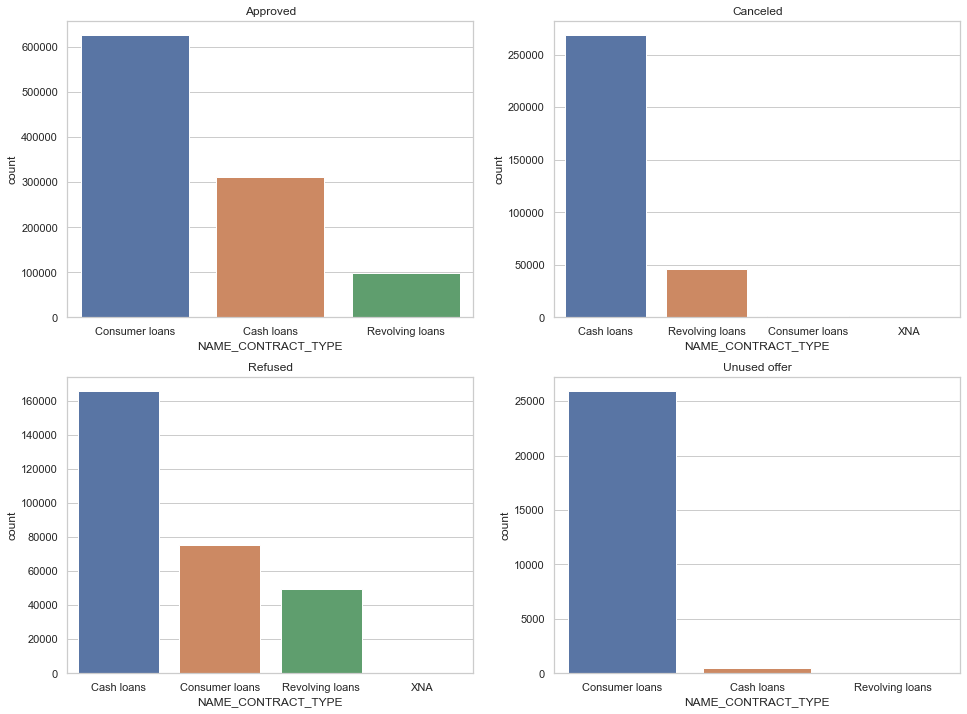

In [111]:
# Univariate analysis for "NAME_CONTRACT_TYPE" column.

plt.figure(figsize = (16, 12))
plt.subplot(2, 2, 1)
sns.countplot(NAME_CONTRACT_STATUS_Approved['NAME_CONTRACT_TYPE'])
plt.title("Approved")
plt.subplot(2, 2, 2)
sns.countplot(NAME_CONTRACT_STATUS_Canceled['NAME_CONTRACT_TYPE'])
plt.title("Canceled")
plt.subplot(2, 2, 3)
sns.countplot(NAME_CONTRACT_STATUS_Refused['NAME_CONTRACT_TYPE'])
plt.title("Refused")
plt.subplot(2, 2, 4)
sns.countplot(NAME_CONTRACT_STATUS_Unused_offer['NAME_CONTRACT_TYPE'])
plt.title("Unused offer")
plt.show()

Observation :-

1. Most approved application are from category Consumer loans follwed by Cash loans and Revolving loans.
2. Maximum applicaion canceled and refused for a cash loans applications.
3. Consumer loans has maximum unused offers followed by cash loans.

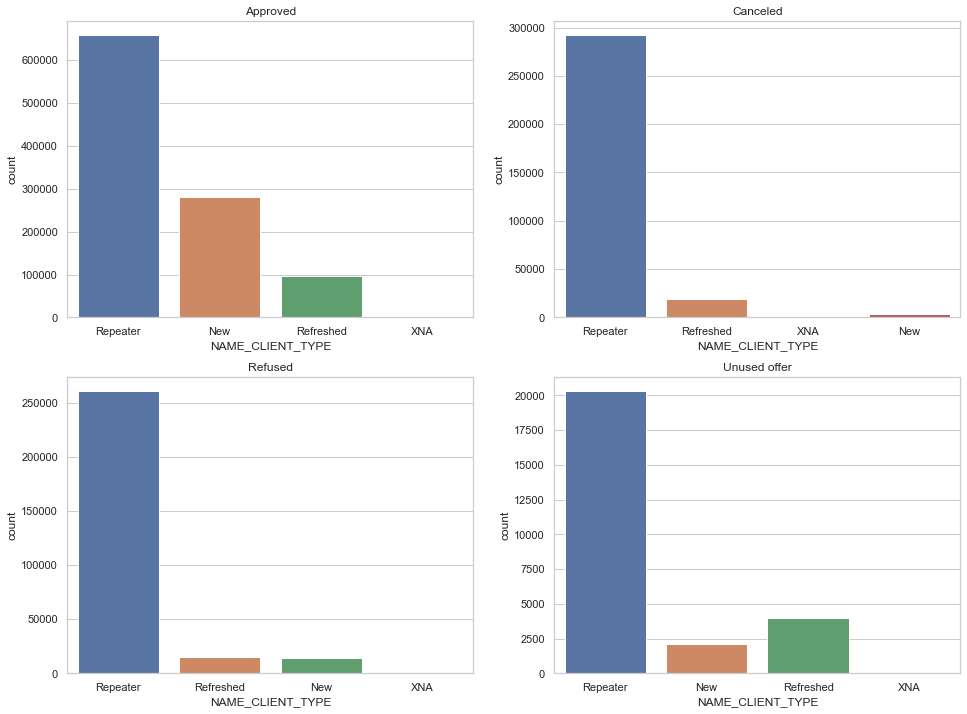

In [112]:
# Univariate analysis for "NAME_CLIENT_TYPE" column.

plt.figure(figsize = (16, 12))
plt.subplot(2, 2, 1)
sns.countplot(NAME_CONTRACT_STATUS_Approved['NAME_CLIENT_TYPE'])
plt.title("Approved")
plt.subplot(2, 2, 2)
sns.countplot(NAME_CONTRACT_STATUS_Canceled['NAME_CLIENT_TYPE'])
plt.title("Canceled")
plt.subplot(2, 2, 3)
sns.countplot(NAME_CONTRACT_STATUS_Refused['NAME_CLIENT_TYPE'])
plt.title("Refused")
plt.subplot(2, 2, 4)
sns.countplot(NAME_CONTRACT_STATUS_Unused_offer['NAME_CLIENT_TYPE'])
plt.title("Unused offer")
plt.show()

Observation :-

1. Mostly approved application belongs to repeater client category followed by new applications.
2. Half amount of repeater client applications are canceled 
3. Repeater client applications refused approx 250K times.

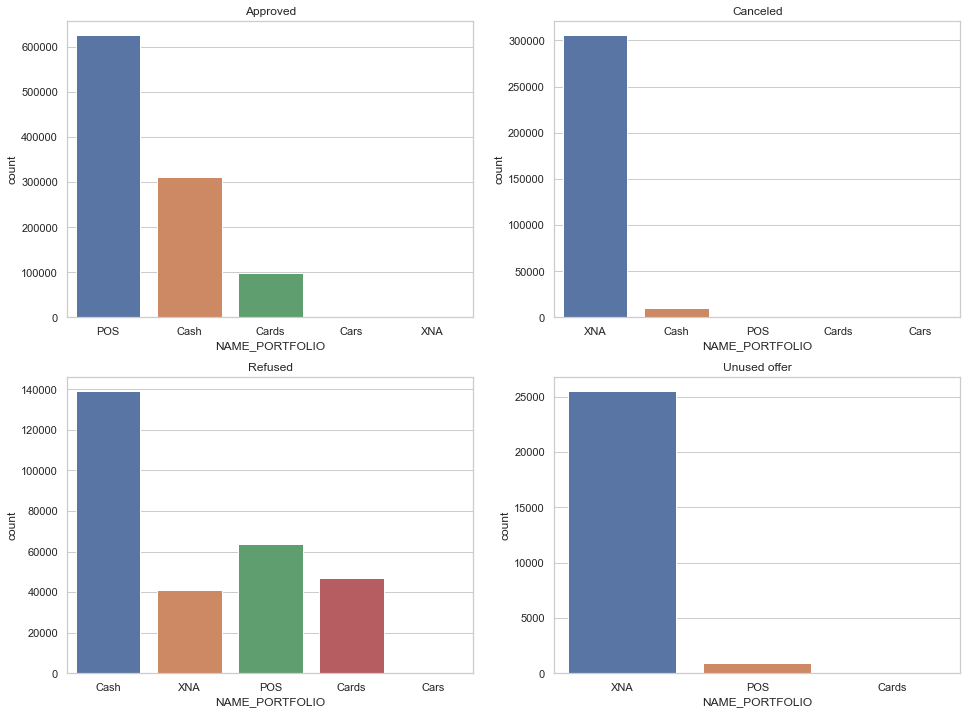

In [113]:
# Univariate analysis for "NAME_PORTFOLIO" column.

plt.figure(figsize = (16, 12))
plt.subplot(2, 2, 1)
sns.countplot(NAME_CONTRACT_STATUS_Approved['NAME_PORTFOLIO'])
plt.title("Approved")
plt.subplot(2, 2, 2)
sns.countplot(NAME_CONTRACT_STATUS_Canceled['NAME_PORTFOLIO'])
plt.title("Canceled")
plt.subplot(2, 2, 3)
sns.countplot(NAME_CONTRACT_STATUS_Refused['NAME_PORTFOLIO'])
plt.title("Refused")
plt.subplot(2, 2, 4)
sns.countplot(NAME_CONTRACT_STATUS_Unused_offer['NAME_PORTFOLIO'])
plt.title("Unused offer")
plt.show()

Observation :-

1. Most approved application was for POS.
2. Most refused application was for Cash.

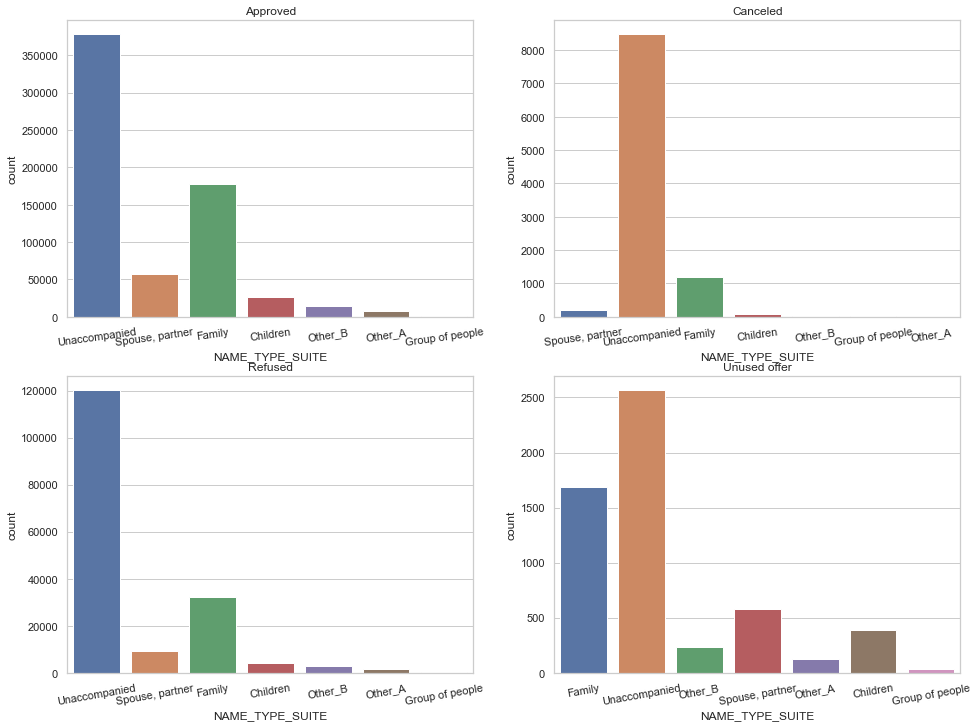

In [114]:
# Univariate analysis for "NAME_TYPE_SUITE" column.

plt.figure(figsize = (16, 12))
plt.subplot(2, 2, 1)
sns.countplot(NAME_CONTRACT_STATUS_Approved['NAME_TYPE_SUITE'])
plt.title("Approved")
plt.xticks(rotation = 8)
plt.subplot(2, 2, 2)
sns.countplot(NAME_CONTRACT_STATUS_Canceled['NAME_TYPE_SUITE'])
plt.title("Canceled")
plt.xticks(rotation = 8)
plt.subplot(2, 2, 3)
sns.countplot(NAME_CONTRACT_STATUS_Refused['NAME_TYPE_SUITE'])
plt.title("Refused")
plt.xticks(rotation = 10)
plt.subplot(2, 2, 4)
sns.countplot(NAME_CONTRACT_STATUS_Unused_offer['NAME_TYPE_SUITE'])
plt.title("Unused offer")
plt.xticks(rotation = 10)
plt.show()

Observation :-

1. Mostly accompanied client when applying for the previous application was Unaccompanied.
2. Unaccompanied clients application approved and refused for maximum times asn compare to other types.

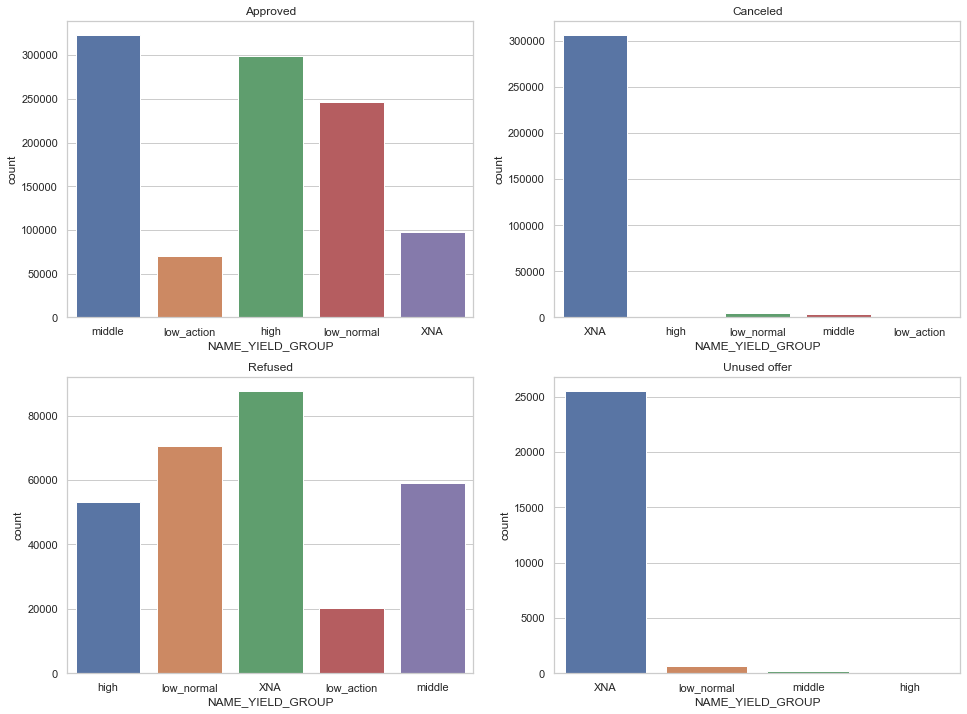

In [115]:
# Univariate analysis for "NAME_YIELD_GROUP" column.

plt.figure(figsize = (16, 12))
plt.subplot(2, 2, 1)
sns.countplot(NAME_CONTRACT_STATUS_Approved['NAME_YIELD_GROUP'])
plt.title("Approved")
plt.subplot(2, 2, 2)
sns.countplot(NAME_CONTRACT_STATUS_Canceled['NAME_YIELD_GROUP'])
plt.title("Canceled")
plt.subplot(2, 2, 3)
sns.countplot(NAME_CONTRACT_STATUS_Refused['NAME_YIELD_GROUP'])
plt.title("Refused")
plt.subplot(2, 2, 4)
sns.countplot(NAME_CONTRACT_STATUS_Unused_offer['NAME_YIELD_GROUP'])
plt.title("Unused offer")
plt.show()

Observation :- 

1. The approved applications has grouped interest rate in middle category.

### 5.4. Perform the Univariate analysis for numerical variables.

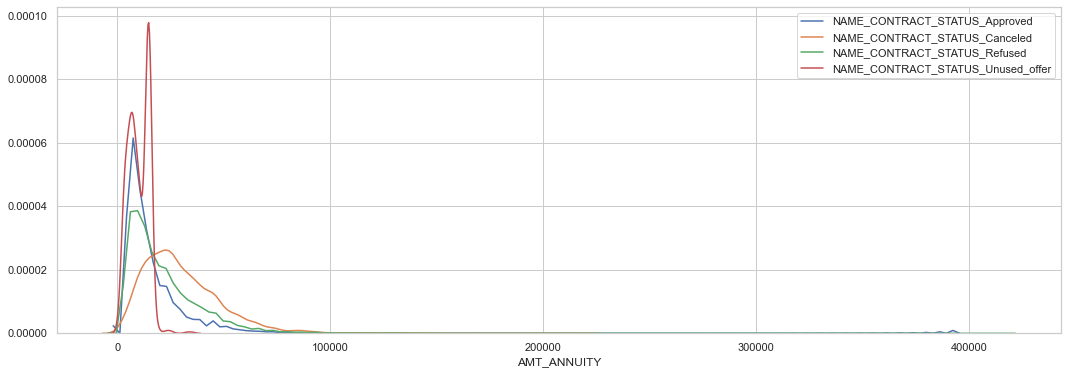

In [116]:
# Univariate analysis for "AMT_ANNUITY" continous variable.

plt.figure(figsize = (18, 6))
sns.distplot(NAME_CONTRACT_STATUS_Approved['AMT_ANNUITY'], hist = False, label = "NAME_CONTRACT_STATUS_Approved")
sns.distplot(NAME_CONTRACT_STATUS_Canceled['AMT_ANNUITY'], hist = False, label = "NAME_CONTRACT_STATUS_Canceled")
sns.distplot(NAME_CONTRACT_STATUS_Refused['AMT_ANNUITY'], hist = False, label = "NAME_CONTRACT_STATUS_Refused")
sns.distplot(NAME_CONTRACT_STATUS_Unused_offer['AMT_ANNUITY'], hist = False, label = "NAME_CONTRACT_STATUS_Unused_offer")
plt.show()

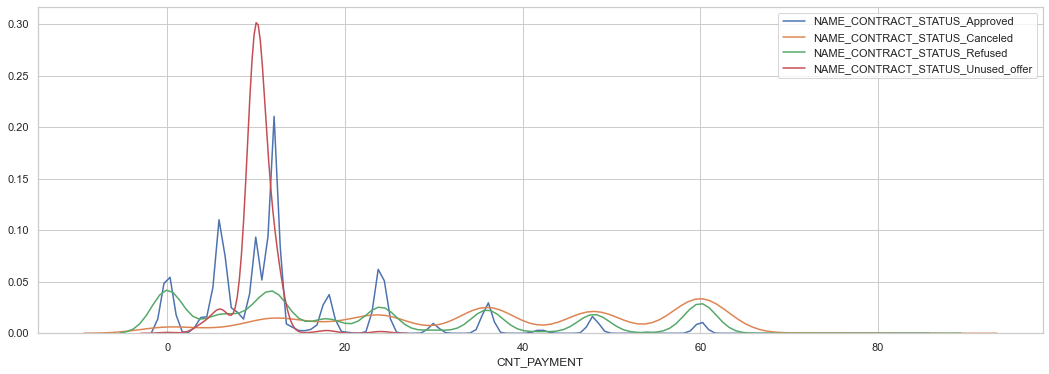

In [117]:
# Univariate analysis for "CNT_PAYMENT" continous variable.

plt.figure(figsize = (18, 6))
sns.distplot(NAME_CONTRACT_STATUS_Approved['CNT_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Approved")
sns.distplot(NAME_CONTRACT_STATUS_Canceled['CNT_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Canceled")
sns.distplot(NAME_CONTRACT_STATUS_Refused['CNT_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Refused")
sns.distplot(NAME_CONTRACT_STATUS_Unused_offer['CNT_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Unused_offer", kde_kws={'bw':1.0})
plt.show()

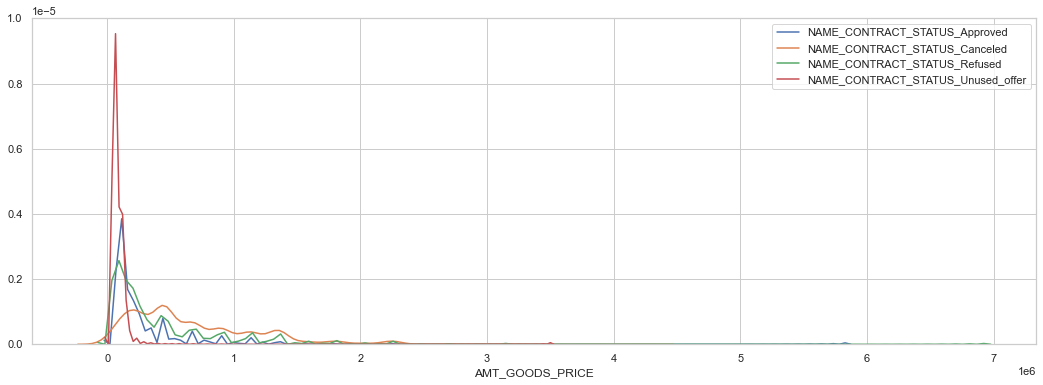

In [118]:
# Univariate analysis for "AMT_GOODS_PRICE" continous variable.

plt.figure(figsize = (18, 6))
sns.distplot(NAME_CONTRACT_STATUS_Approved['AMT_GOODS_PRICE'], hist = False, label = "NAME_CONTRACT_STATUS_Approved")
sns.distplot(NAME_CONTRACT_STATUS_Canceled['AMT_GOODS_PRICE'], hist = False, label = "NAME_CONTRACT_STATUS_Canceled")
sns.distplot(NAME_CONTRACT_STATUS_Refused['AMT_GOODS_PRICE'], hist = False, label = "NAME_CONTRACT_STATUS_Refused")
sns.distplot(NAME_CONTRACT_STATUS_Unused_offer['AMT_GOODS_PRICE'], hist = False, label = "NAME_CONTRACT_STATUS_Unused_offer")
plt.show()

Observations:
<br>From the graph we can see that for goods price less than 5 lakhs we have most unused offers.
<br>The rate of contract status being cancelled is more as compared to the status approved.
<br>More number of contracts are cancelled with goods price less than 10 laks however the rate of contract getting cancelled is more.

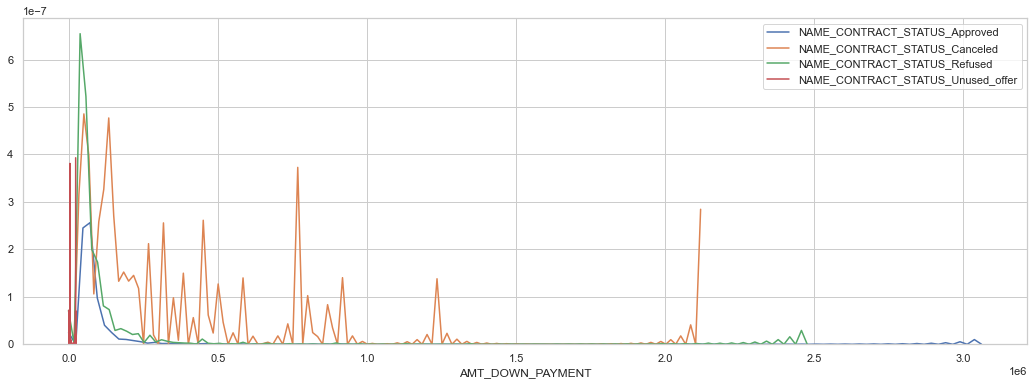

In [119]:
# Univariate analysis for "AMT_DOWN_PAYMENT" continous variable.

plt.figure(figsize = (18, 6))
sns.distplot(NAME_CONTRACT_STATUS_Approved['AMT_DOWN_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Approved")
sns.distplot(NAME_CONTRACT_STATUS_Canceled['AMT_DOWN_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Canceled", kde_kws={'bw':0.2})
sns.distplot(NAME_CONTRACT_STATUS_Refused['AMT_DOWN_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Refused")
sns.distplot(NAME_CONTRACT_STATUS_Unused_offer['AMT_DOWN_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Unused_offer", kde_kws={'bw':0.2})
plt.show()

Observations:
From the graph we can see that for down payment  less than 2.5 lakhs we have more chances of loan getting apporved.
The rate of contract status being cancelled is more as compared to the status approved.
More number of contracts are refused.

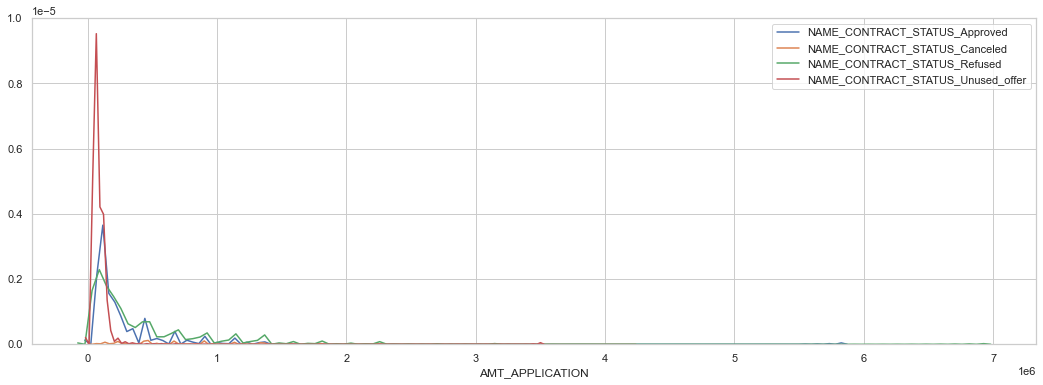

In [120]:
# Univariate analysis for "AMT_APPLICATION" continous variable.

plt.figure(figsize = (18, 6))
sns.distplot(NAME_CONTRACT_STATUS_Approved['AMT_APPLICATION'], hist = False, label = "NAME_CONTRACT_STATUS_Approved")
sns.distplot(NAME_CONTRACT_STATUS_Canceled['AMT_APPLICATION'], hist = False, label = "NAME_CONTRACT_STATUS_Canceled", kde_kws={'bw':0.2})
sns.distplot(NAME_CONTRACT_STATUS_Refused['AMT_APPLICATION'], hist = False, label = "NAME_CONTRACT_STATUS_Refused")
sns.distplot(NAME_CONTRACT_STATUS_Unused_offer['AMT_APPLICATION'], hist = False, label = "NAME_CONTRACT_STATUS_Unused_offer")
plt.show()

Observations:
<br>We can observe that the rate of loan is getting approved is more upto the amount 2.5 laks and it is reducing as the 'AMT_APPLICATION' is increasing. Hence the status being refused in increasing.
<br>Unused offers are very less above 2.5 lakhs.

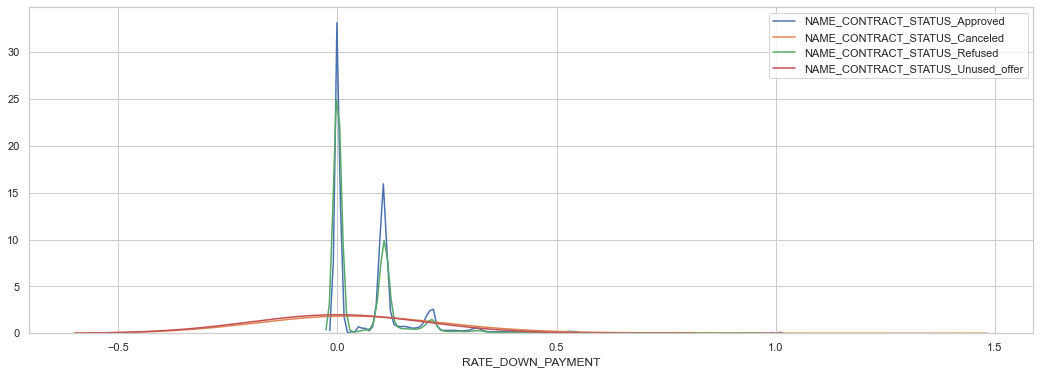

In [121]:
# Univariate analysis for "RATE_DOWN_PAYMENT" continous variable.

plt.figure(figsize = (18, 6))
sns.distplot(NAME_CONTRACT_STATUS_Approved['RATE_DOWN_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Approved")
sns.distplot(NAME_CONTRACT_STATUS_Canceled['RATE_DOWN_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Canceled", kde_kws={'bw':0.2})
sns.distplot(NAME_CONTRACT_STATUS_Refused['RATE_DOWN_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Refused")
sns.distplot(NAME_CONTRACT_STATUS_Unused_offer['RATE_DOWN_PAYMENT'], hist = False, label = "NAME_CONTRACT_STATUS_Unused_offer", kde_kws={'bw':0.2})
plt.show()

Observations:
<br>From the above graph we can see that the chances of loan getting approved are more than it getting refused.
<br>More is the rate of down payment less is the chance of loan getting refused.

### 5.5. Perform Bivariate analysis

### 5.5.1. Bivariate analysis for Continous - Continous variable.

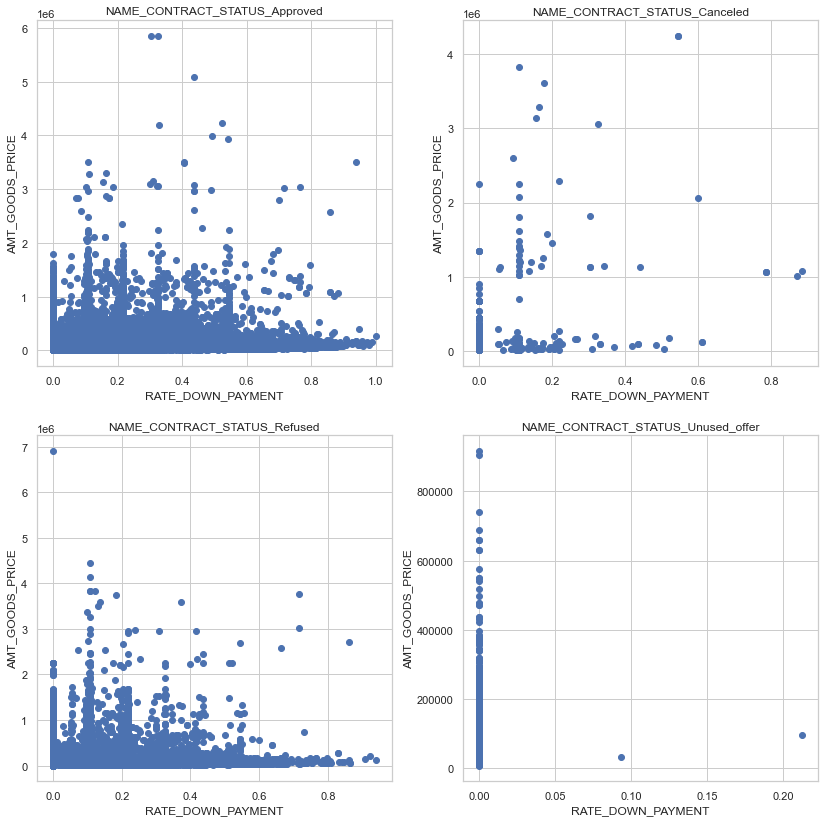

In [122]:
# Bivariate analysis for "RATE_DOWM_PAYMENT", "AMT_GOODS_PRICE" variables.

plt.figure(figsize = (14, 14))
plt.subplot(2, 2, 1)
plt.scatter(NAME_CONTRACT_STATUS_Approved["RATE_DOWN_PAYMENT"], NAME_CONTRACT_STATUS_Approved["AMT_GOODS_PRICE"])
plt.xlabel("RATE_DOWN_PAYMENT")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
plt.scatter(NAME_CONTRACT_STATUS_Canceled["RATE_DOWN_PAYMENT"], NAME_CONTRACT_STATUS_Canceled["AMT_GOODS_PRICE"])
plt.xlabel("RATE_DOWN_PAYMENT")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
plt.scatter(NAME_CONTRACT_STATUS_Refused["RATE_DOWN_PAYMENT"], NAME_CONTRACT_STATUS_Refused["AMT_GOODS_PRICE"])
plt.xlabel("RATE_DOWN_PAYMENT")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
plt.scatter(NAME_CONTRACT_STATUS_Unused_offer["RATE_DOWN_PAYMENT"], NAME_CONTRACT_STATUS_Unused_offer["AMT_GOODS_PRICE"])
plt.xlabel("RATE_DOWN_PAYMENT")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show()

Observation :-

The chances of approving and refusing the clients application are likely to be same but mostly the application get approved on certain Rate of down payment.

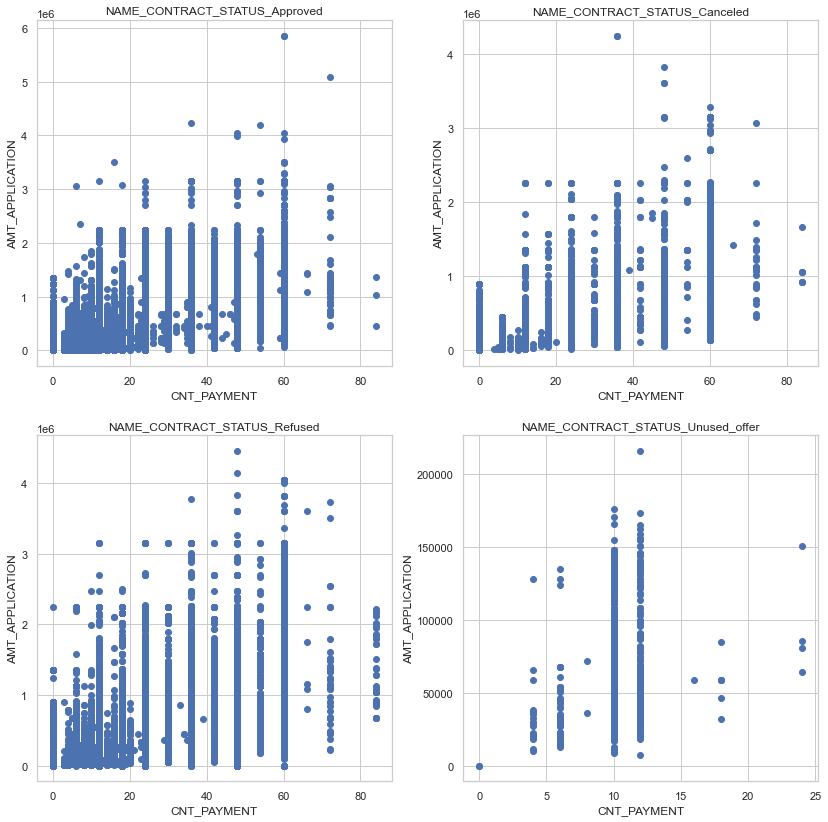

In [123]:
# Bivariate analysis for "CNT_PAYMENT", "AMT_APPLICATION" variables.

plt.figure(figsize = (14, 14))
plt.subplot(2, 2, 1)
plt.scatter(NAME_CONTRACT_STATUS_Approved["CNT_PAYMENT"], NAME_CONTRACT_STATUS_Approved["AMT_APPLICATION"])
plt.xlabel("CNT_PAYMENT")
plt.ylabel("AMT_APPLICATION")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
plt.scatter(NAME_CONTRACT_STATUS_Canceled["CNT_PAYMENT"], NAME_CONTRACT_STATUS_Canceled["AMT_APPLICATION"])
plt.xlabel("CNT_PAYMENT")
plt.ylabel("AMT_APPLICATION")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
plt.scatter(NAME_CONTRACT_STATUS_Refused["CNT_PAYMENT"], NAME_CONTRACT_STATUS_Refused["AMT_APPLICATION"])
plt.xlabel("CNT_PAYMENT")
plt.ylabel("AMT_APPLICATION")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
plt.scatter(NAME_CONTRACT_STATUS_Unused_offer["CNT_PAYMENT"], NAME_CONTRACT_STATUS_Unused_offer["AMT_APPLICATION"])
plt.xlabel("CNT_PAYMENT")
plt.ylabel("AMT_APPLICATION")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show()

Observation :-

1. Applications with Term of previous credit 20, 40, 60 are more likely to approved.
2. Clients application in between 0 to 20 term are more likely to be approved and refused.

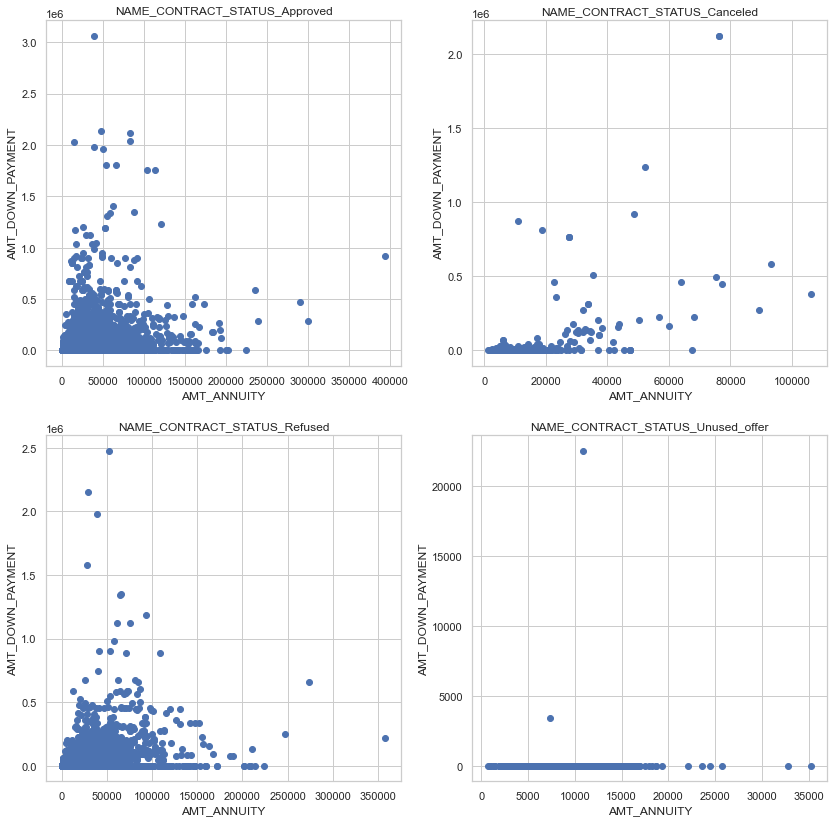

In [124]:
# Bivariate analysis for "AMT_ANNUITY", "AMT_DOWN_PAYMENT" variables.

plt.figure(figsize = (14, 14))
plt.subplot(2, 2, 1)
plt.scatter(NAME_CONTRACT_STATUS_Approved["AMT_ANNUITY"], NAME_CONTRACT_STATUS_Approved["AMT_DOWN_PAYMENT"])
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_DOWN_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
plt.scatter(NAME_CONTRACT_STATUS_Canceled["AMT_ANNUITY"], NAME_CONTRACT_STATUS_Canceled["AMT_DOWN_PAYMENT"])
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_DOWN_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
plt.scatter(NAME_CONTRACT_STATUS_Refused["AMT_ANNUITY"], NAME_CONTRACT_STATUS_Refused["AMT_DOWN_PAYMENT"])
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_DOWN_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
plt.scatter(NAME_CONTRACT_STATUS_Unused_offer["AMT_ANNUITY"], NAME_CONTRACT_STATUS_Unused_offer["AMT_DOWN_PAYMENT"])
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_DOWN_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show()

Observation :-

1. As the annuity of aplication increases the amount of dowm payment also increases in case if application is approved.

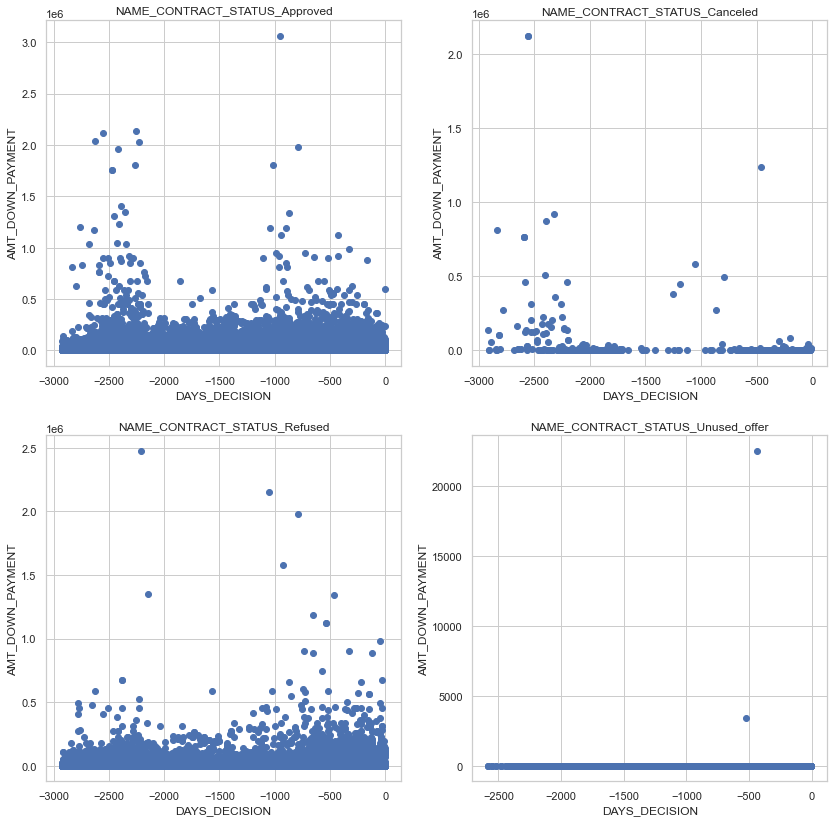

In [125]:
# Bivariate analysis for "DAYS_DECISION", "AMT_DOWN_PAYMENT" variables.

plt.figure(figsize = (14, 14))
plt.subplot(2, 2, 1)
plt.scatter(NAME_CONTRACT_STATUS_Approved["DAYS_DECISION"], NAME_CONTRACT_STATUS_Approved["AMT_DOWN_PAYMENT"])
plt.xlabel("DAYS_DECISION")
plt.ylabel("AMT_DOWN_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
plt.scatter(NAME_CONTRACT_STATUS_Canceled["DAYS_DECISION"], NAME_CONTRACT_STATUS_Canceled["AMT_DOWN_PAYMENT"])
plt.xlabel("DAYS_DECISION")
plt.ylabel("AMT_DOWN_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
plt.scatter(NAME_CONTRACT_STATUS_Refused["DAYS_DECISION"], NAME_CONTRACT_STATUS_Refused["AMT_DOWN_PAYMENT"])
plt.xlabel("DAYS_DECISION")
plt.ylabel("AMT_DOWN_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
plt.scatter(NAME_CONTRACT_STATUS_Unused_offer["DAYS_DECISION"], NAME_CONTRACT_STATUS_Unused_offer["AMT_DOWN_PAYMENT"])
plt.xlabel("DAYS_DECISION")
plt.ylabel("AMT_DOWN_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show()

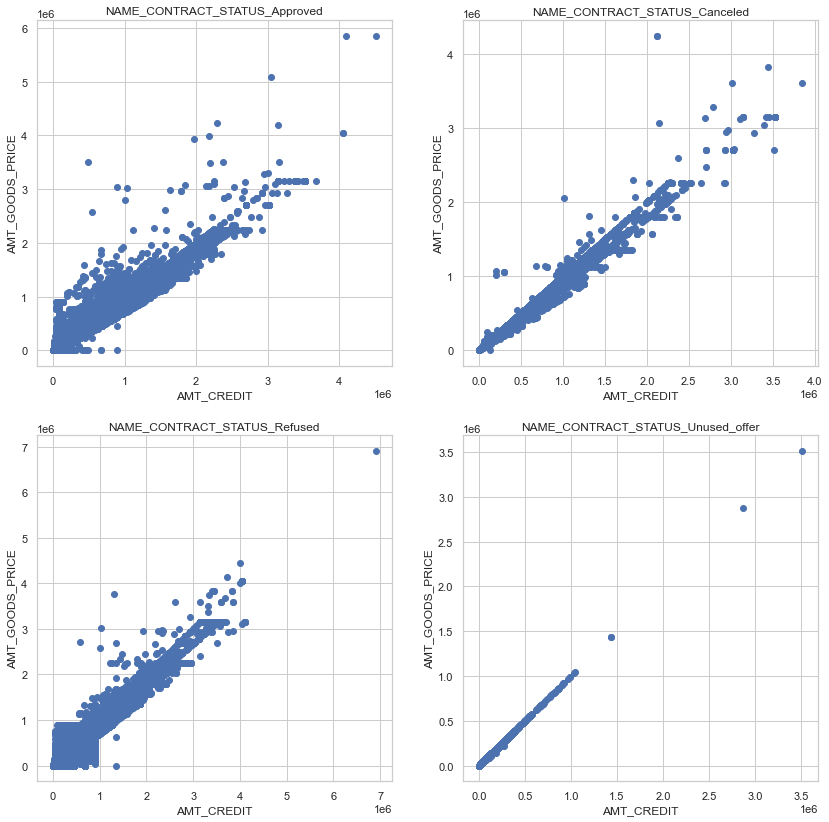

In [126]:
# Bivariate analysis for "AMT_CREDIT", "AMT_GOODS_PRICE" variables.

plt.figure(figsize = (14, 14))
plt.subplot(2, 2, 1)
plt.scatter(NAME_CONTRACT_STATUS_Approved["AMT_CREDIT"], NAME_CONTRACT_STATUS_Approved["AMT_GOODS_PRICE"])
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
plt.scatter(NAME_CONTRACT_STATUS_Canceled["AMT_CREDIT"], NAME_CONTRACT_STATUS_Canceled["AMT_GOODS_PRICE"])
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
plt.scatter(NAME_CONTRACT_STATUS_Refused["AMT_CREDIT"], NAME_CONTRACT_STATUS_Refused["AMT_GOODS_PRICE"])
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
plt.scatter(NAME_CONTRACT_STATUS_Unused_offer["AMT_CREDIT"], NAME_CONTRACT_STATUS_Unused_offer["AMT_GOODS_PRICE"])
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")

plt.show()

Observation :- 

1. As the final credit amount on previous application increases teh goods price of good that client asked for previous application also increases in every cases Approved, Canceled, Refused, and Unused offer.

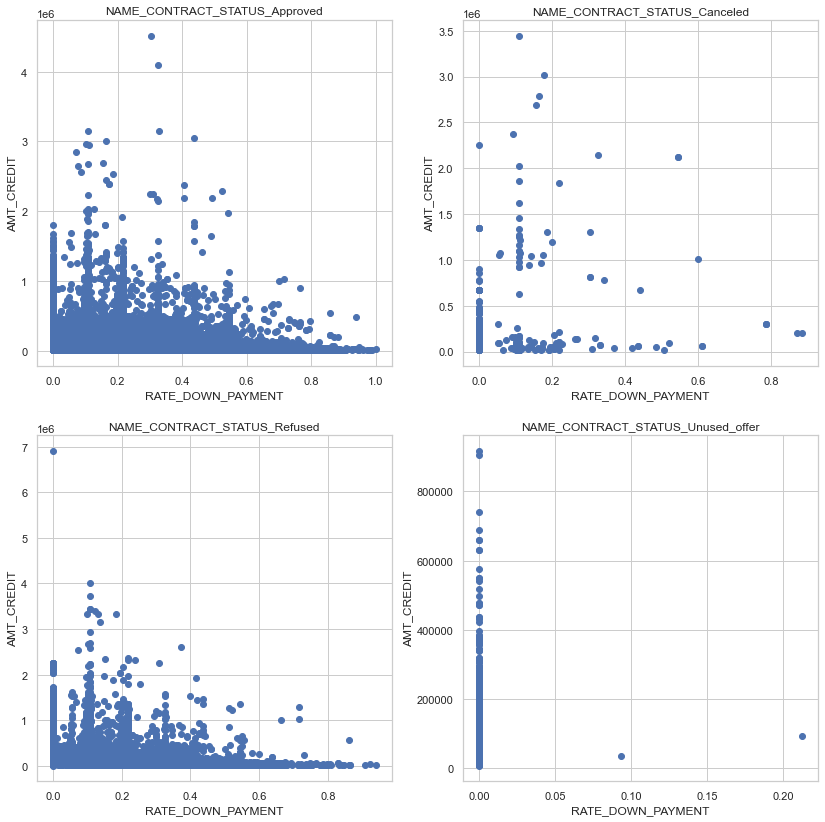

In [127]:
# Bivariate analysis for "RATE_DOWN_PAYMENT", "AMT_CREDIT" variables.

plt.figure(figsize = (14, 14))
plt.subplot(2, 2, 1)
plt.scatter(NAME_CONTRACT_STATUS_Approved["RATE_DOWN_PAYMENT"], NAME_CONTRACT_STATUS_Approved["AMT_CREDIT"])
plt.xlabel("RATE_DOWN_PAYMENT")
plt.ylabel("AMT_CREDIT")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
plt.scatter(NAME_CONTRACT_STATUS_Canceled["RATE_DOWN_PAYMENT"], NAME_CONTRACT_STATUS_Canceled["AMT_CREDIT"])
plt.xlabel("RATE_DOWN_PAYMENT")
plt.ylabel("AMT_CREDIT")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
plt.scatter(NAME_CONTRACT_STATUS_Refused["RATE_DOWN_PAYMENT"], NAME_CONTRACT_STATUS_Refused["AMT_CREDIT"])
plt.xlabel("RATE_DOWN_PAYMENT")
plt.ylabel("AMT_CREDIT")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
plt.scatter(NAME_CONTRACT_STATUS_Unused_offer["RATE_DOWN_PAYMENT"], NAME_CONTRACT_STATUS_Unused_offer["AMT_CREDIT"])
plt.xlabel("RATE_DOWN_PAYMENT")
plt.ylabel("AMT_CREDIT")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show()

### 5.5.2 Bivariate analysis for Continous - Categorical variable.

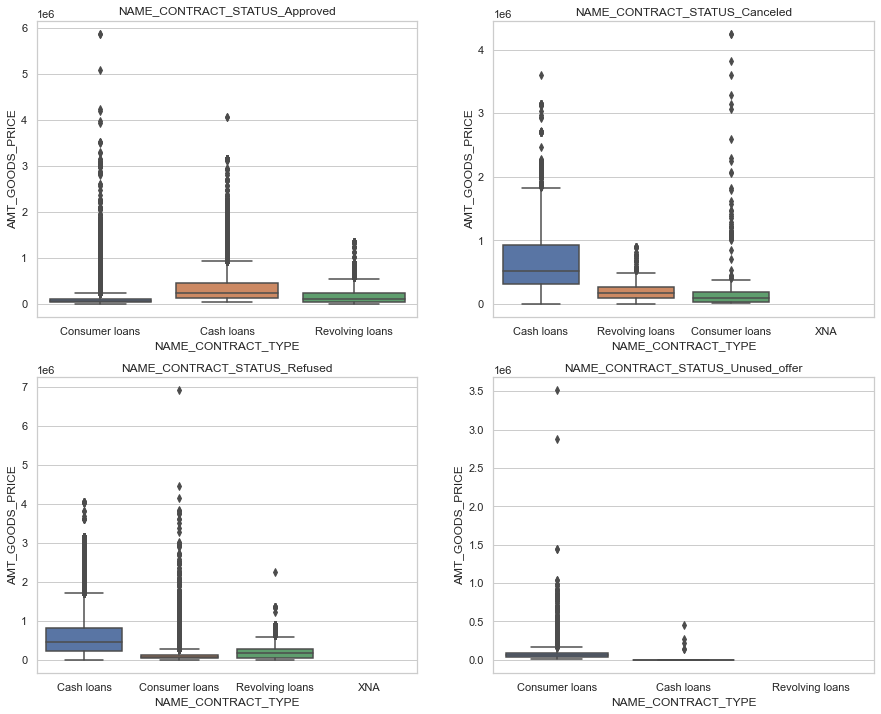

In [128]:
# Bivariate analysis for "NAME_CONTRACT_TYPE" "AMT_GOODS_PRICE" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = "AMT_GOODS_PRICE", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_GOODS_PRICE")
#plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = "AMT_GOODS_PRICE", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_GOODS_PRICE")
#plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = "AMT_GOODS_PRICE", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_GOODS_PRICE")
#plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.boxplot(x = "NAME_CONTRACT_TYPE", y = "AMT_GOODS_PRICE", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_GOODS_PRICE")
#plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation:- 

1. Most approved application are from category Consumer loans follwed by Cash loans and Revolving loans.
2. Maximum applicaion canceled and refused for a cash loans applications.
3. Consumer loans has maximum unused offers followed by cash loans.

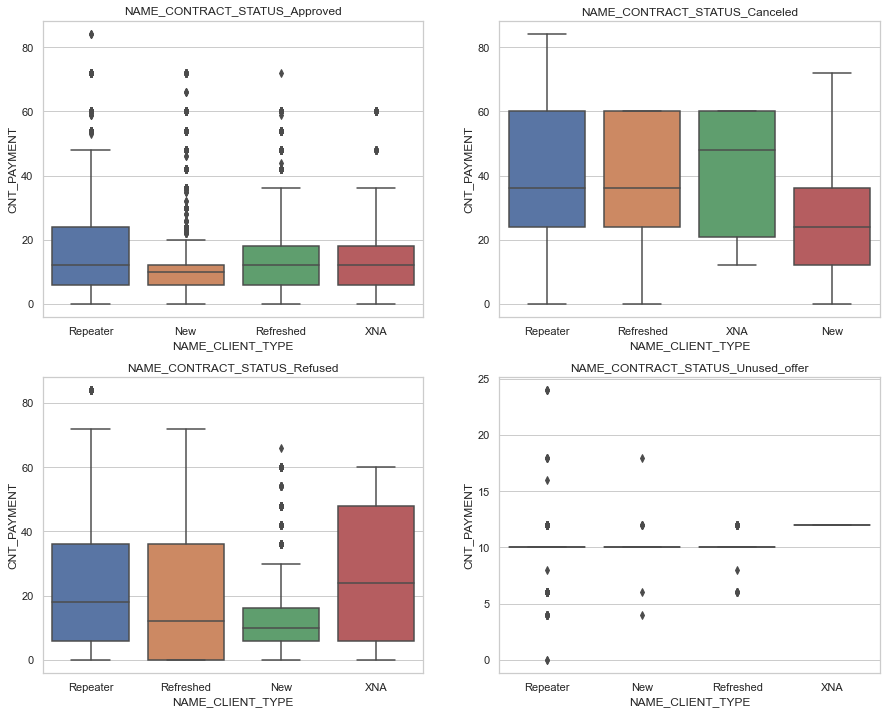

In [142]:
# Bivariate analysis for "NAME_CLIENT_TYPE" "CNT_PAYMENT" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x = "NAME_CLIENT_TYPE", y = "CNT_PAYMENT", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("CNT_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.boxplot(x = "NAME_CLIENT_TYPE", y = "CNT_PAYMENT", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("CNT_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.boxplot(x = "NAME_CLIENT_TYPE", y = "CNT_PAYMENT", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("CNT_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.boxplot(x = "NAME_CLIENT_TYPE", y = "CNT_PAYMENT", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("CNT_PAYMENT")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation :-

1. Most of the previous applications have client type Repeater (~1M), just over 200K are New and ~100K are Refreshed.
2. In terms of default percent for current applications of clients with history of previous applications, current clients with previous applications have values of percent of defaults ranging from from 8.5%, 8.25% and 7% corresponding to client types in the past New, Repeater and Refreshed, respectivelly.

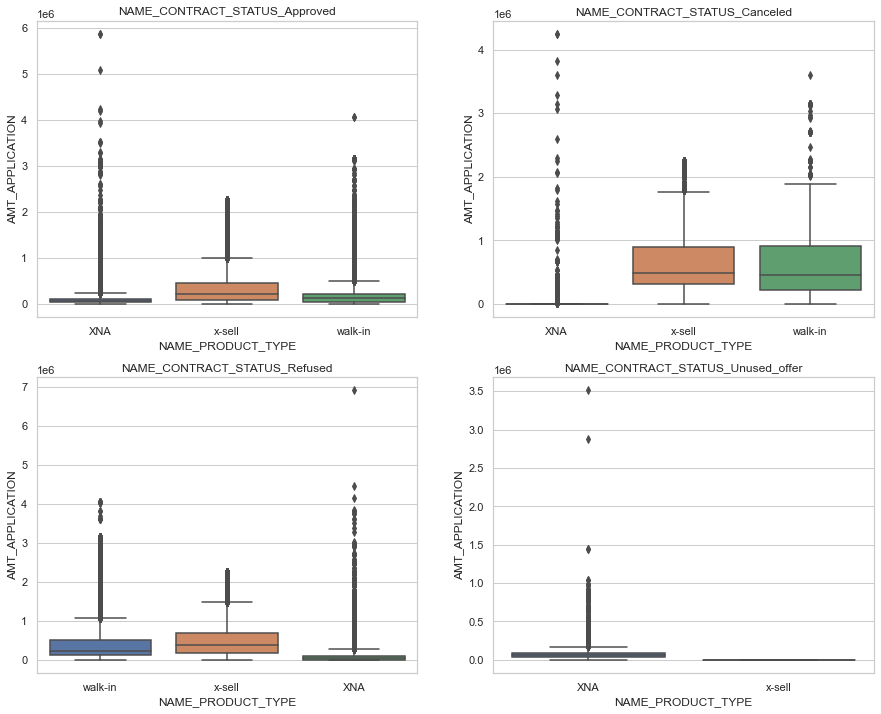

In [130]:
# Bivariate analysis for "NAME_PRODUCT_TYPE" "AMT_APPLICATION" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x = "NAME_PRODUCT_TYPE", y = "AMT_APPLICATION", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_PRODUCT_TYPE")
plt.ylabel("AMT_APPLICATION")
#plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.boxplot(x = "NAME_PRODUCT_TYPE", y = "AMT_APPLICATION", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_PRODUCT_TYPE")
plt.ylabel("AMT_APPLICATION")
#plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.boxplot(x = "NAME_PRODUCT_TYPE", y = "AMT_APPLICATION", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_PRODUCT_TYPE")
plt.ylabel("AMT_APPLICATION")
#plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.boxplot(x = "NAME_PRODUCT_TYPE", y = "AMT_APPLICATION", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_PRODUCT_TYPE")
plt.ylabel("AMT_APPLICATION")
#plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation :-

X-sell applications were more than walk-in

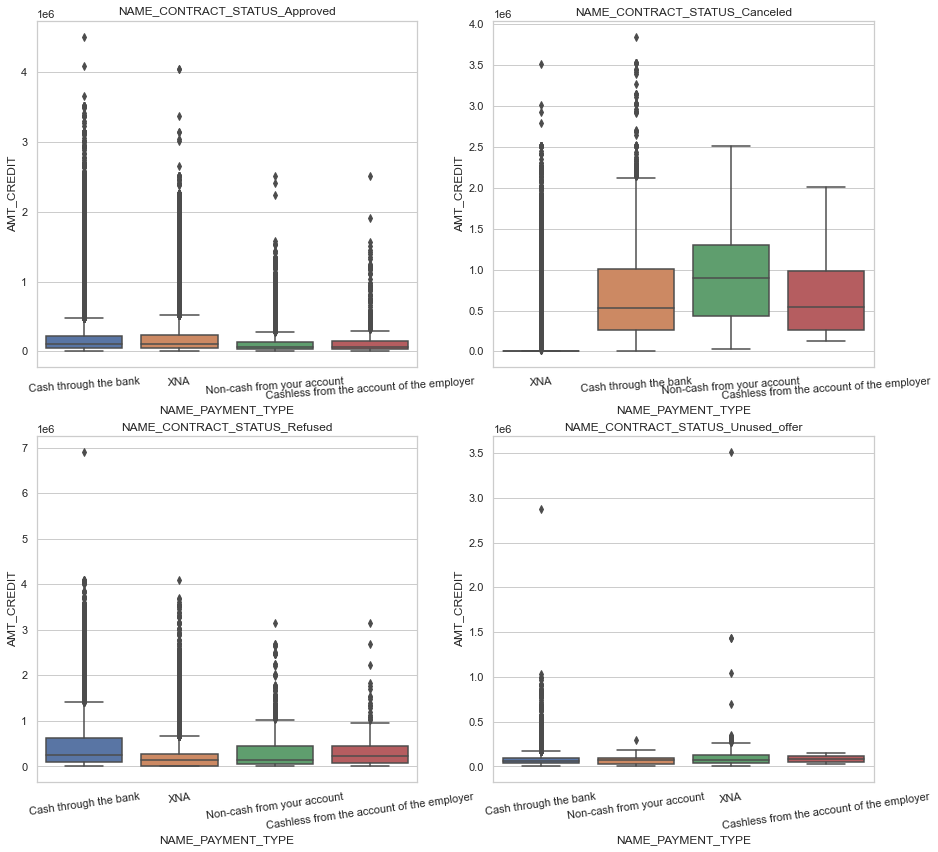

In [131]:
# Bivariate analysis for "NAME_PAYMENT_TYPE" "AMT_CREDIT" variables.

plt.figure(figsize = (15, 14))
plt.subplot(2, 2, 1)
sns.boxplot(x = "NAME_PAYMENT_TYPE", y = "AMT_CREDIT", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation = 4)
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.boxplot(x = "NAME_PAYMENT_TYPE", y = "AMT_CREDIT", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation = 4)
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.boxplot(x = "NAME_PAYMENT_TYPE", y = "AMT_CREDIT", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation = 8)
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.boxplot(x = "NAME_PAYMENT_TYPE", y = "AMT_CREDIT", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.xticks(rotation = 8)
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation :-

1. Most of the previous applications were paid with Cash through the bank (~850K). 
2. Payments using Non-cash from your account or Cashless from the account of the employer are much rare. These three types of payments in previous applications results in allmost the same percent of defaults for current clients (~8% each).

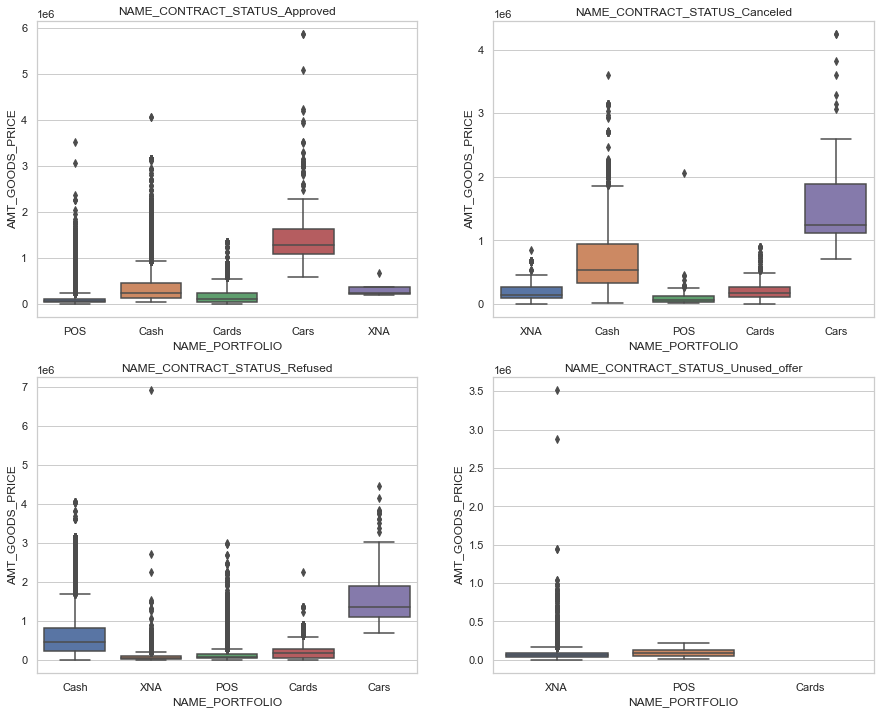

In [132]:
# Bivariate analysis for "NAME_PORTFOLIO" "AMT_GOODS_PRICE" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x = "NAME_PORTFOLIO", y = "AMT_GOODS_PRICE", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.boxplot(x = "NAME_PORTFOLIO", y = "AMT_GOODS_PRICE", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.boxplot(x = "NAME_PORTFOLIO", y = "AMT_GOODS_PRICE", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.boxplot(x = "NAME_PORTFOLIO", y = "AMT_GOODS_PRICE", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("AMT_GOODS_PRICE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

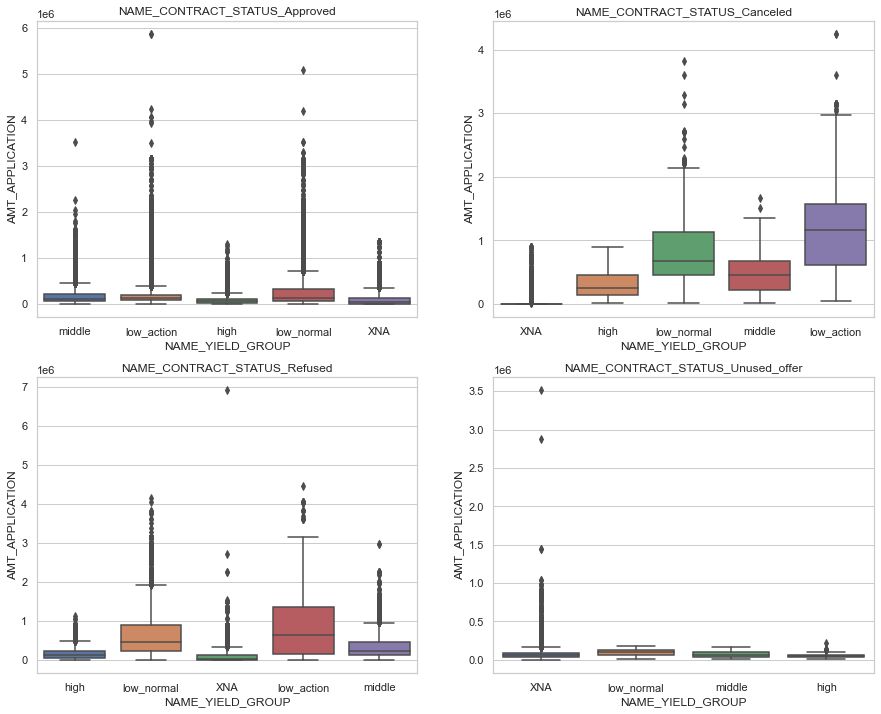

In [133]:
# Bivariate analysis for "NAME_YIELD_GROUP" "AMT_APPLICATION" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x = "NAME_YIELD_GROUP", y = "AMT_APPLICATION", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("AMT_APPLICATION")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.boxplot(x = "NAME_YIELD_GROUP", y = "AMT_APPLICATION", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("AMT_APPLICATION")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.boxplot(x = "NAME_YIELD_GROUP", y = "AMT_APPLICATION", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("AMT_APPLICATION")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.boxplot(x = "NAME_YIELD_GROUP", y = "AMT_APPLICATION", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("AMT_APPLICATION")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation :-

1. Most approved loans were from Middle Yield Goup
2. Most refused loans were from Yield Goups Not specified

### 5.5.3. Bivariate analysis for Categorical - Categorical variable.

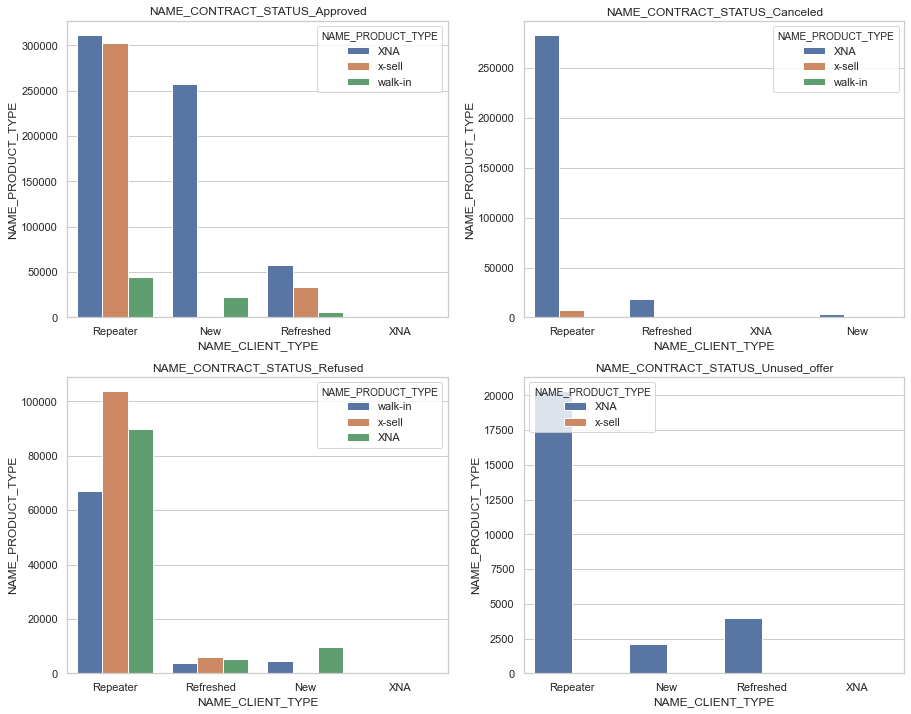

In [134]:
# Bivariate analysis for "NAME_CLIENT_TYPE" "NAME_PRODUCT_TYPE" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "NAME_PRODUCT_TYPE", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("NAME_PRODUCT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "NAME_PRODUCT_TYPE", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("NAME_PRODUCT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "NAME_PRODUCT_TYPE", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("NAME_PRODUCT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "NAME_PRODUCT_TYPE", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("NAME_PRODUCT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation :-

1. The repeater applicant has maximum approved rate.
2. Most of the previous applications have client type Repeater (~1M), just over 200K are New and ~100K are Refreshed.
3. In terms of default percent for current applications of clients with history of previous applications, current clients with previous applications have values of percent of defaults ranging from from 8.5%, 8.25% and 7% corresponding to client types in the past New, Repeater and Refreshed, respectively

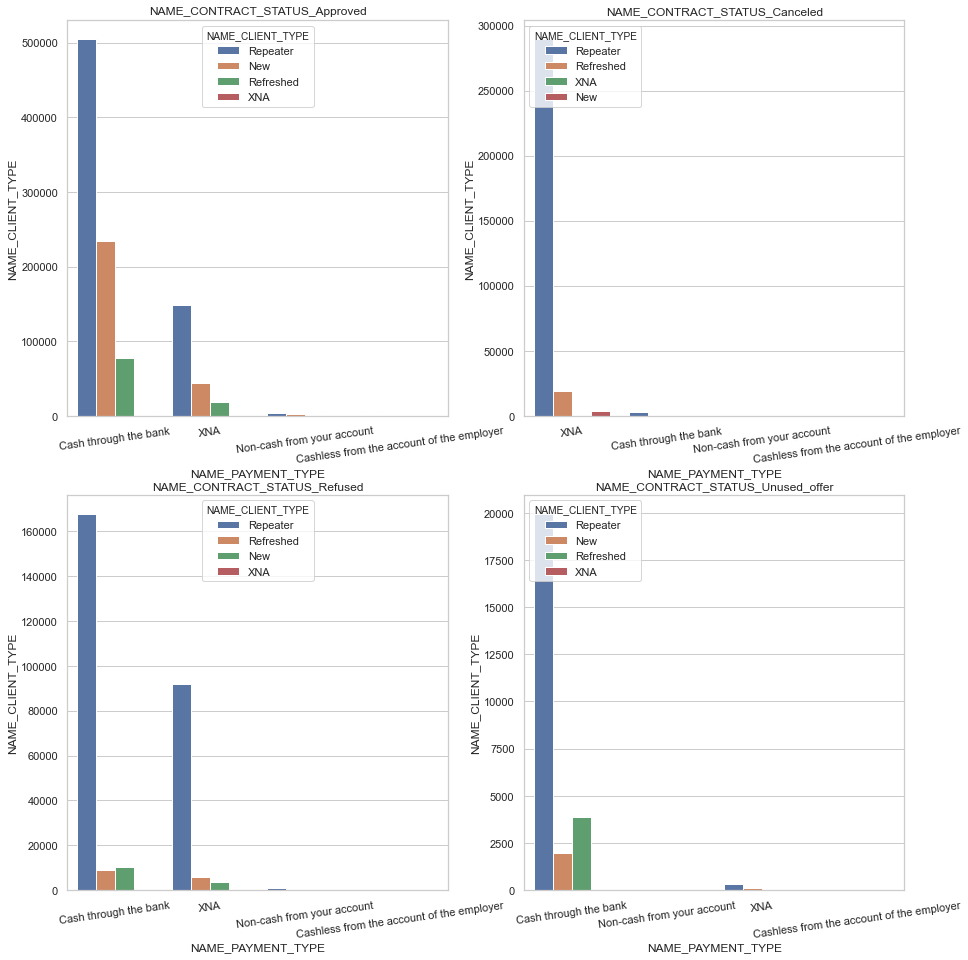

In [135]:
# Bivariate analysis for "NAME_PAYMENT_TYPE", "NAME_CLIENT_TYPE" variables.

plt.figure(figsize = (15, 16))
plt.subplot(2, 2, 1)
sns.countplot(x = "NAME_PAYMENT_TYPE", hue = "NAME_CLIENT_TYPE", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("NAME_CLIENT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Approved")
plt.xticks(rotation = 8)

plt.subplot(2, 2, 2)
sns.countplot(x = "NAME_PAYMENT_TYPE", hue = "NAME_CLIENT_TYPE", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("NAME_CLIENT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Canceled")
plt.xticks(rotation = 8)

plt.subplot(2, 2, 3)
sns.countplot(x = "NAME_PAYMENT_TYPE", hue = "NAME_CLIENT_TYPE", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("NAME_CLIENT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Refused")
plt.xticks(rotation = 8)

plt.subplot(2, 2, 4)
sns.countplot(x = "NAME_PAYMENT_TYPE", hue = "NAME_CLIENT_TYPE", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_PAYMENT_TYPE")
plt.ylabel("NAME_CLIENT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.xticks(rotation = 8)
plt.show() 

Observation :-

1. Repeater applicant has payment type as cash through the bank maximum time.
2. Most of the previous applications were paid with Cash through the bank (~850K). 
3. Payments using Non-cash from your account or Cashless from the account of the employer are much rare. These three types of payments in previous applications results in allmost the same percent of defaults for current clients (~8% each).


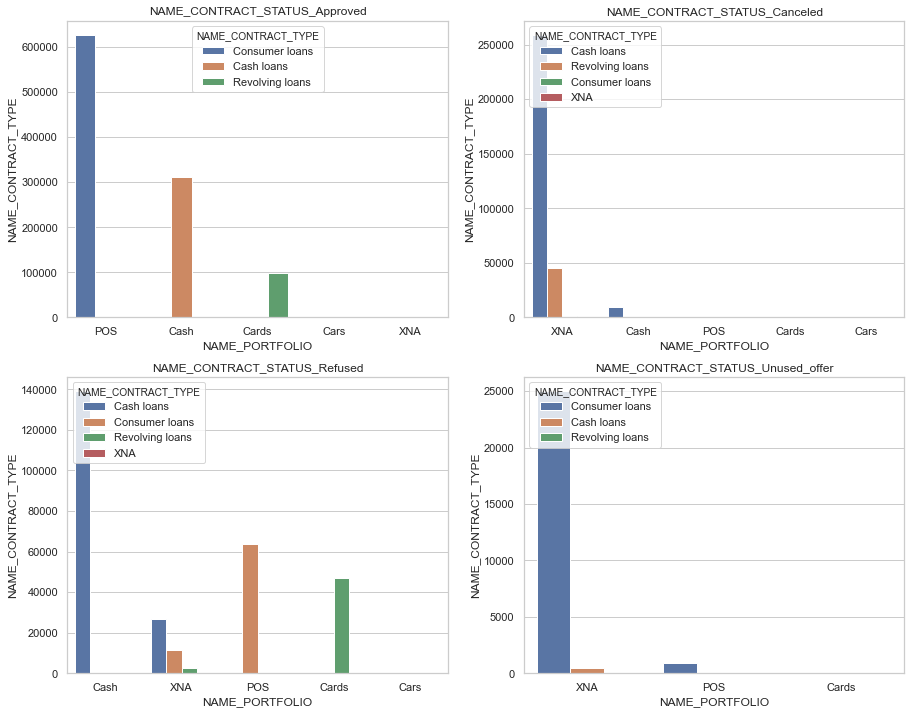

In [136]:
# Bivariate analysis for "NAME_PORTFOLIO" "NAME_CONTRACT_TYPE" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.countplot(x = "NAME_PORTFOLIO", hue = "NAME_CONTRACT_TYPE", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.countplot(x = "NAME_PORTFOLIO", hue = "NAME_CONTRACT_TYPE", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.countplot(x = "NAME_PORTFOLIO", hue = "NAME_CONTRACT_TYPE", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.countplot(x = "NAME_PORTFOLIO", hue = "NAME_CONTRACT_TYPE", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_PORTFOLIO")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation :-

1. Most approved loans were POS and contract type is consumer loans.
2. Most refused loans were Cash and contract type is Cash loans.

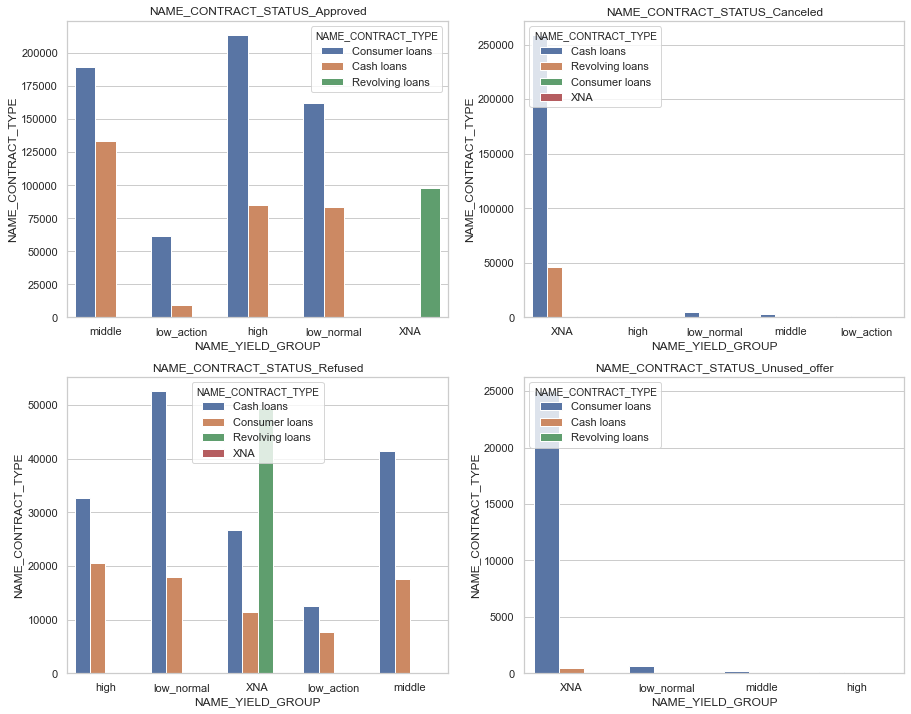

In [137]:
# Bivariate analysis for "NAME_YIELD_GROUP" "NAME_CONTRACT_TYPE" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.countplot(x = "NAME_YIELD_GROUP", hue = "NAME_CONTRACT_TYPE", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.countplot(x = "NAME_YIELD_GROUP", hue = "NAME_CONTRACT_TYPE", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.countplot(x = "NAME_YIELD_GROUP", hue = "NAME_CONTRACT_TYPE", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.countplot(x = "NAME_YIELD_GROUP", hue = "NAME_CONTRACT_TYPE", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("NAME_CONTRACT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation :-

1. Most approved loans were from Middle Yield Goup and High Yield Group and has contract type as consumer loans.
2. Most refused loans were from Yield Goups are low_normal and name contract type as cash loans.

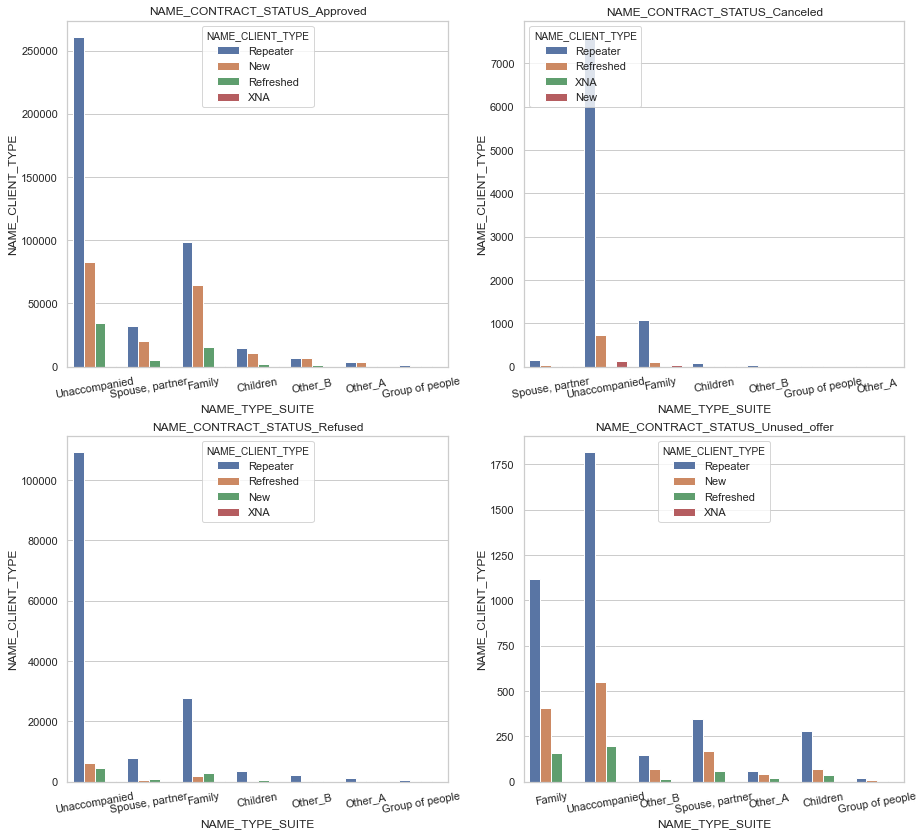

In [138]:
# Bivariate analysis for "NAME_TYPE_SUITE" "NAME_CLIENT_TYPE" variables.

plt.figure(figsize = (15, 14))
plt.subplot(2, 2, 1)
sns.countplot(x = "NAME_TYPE_SUITE", hue = "NAME_CLIENT_TYPE", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("NAME_CLIENT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Approved")
plt.xticks(rotation = 10)

plt.subplot(2, 2, 2)
sns.countplot(x = "NAME_TYPE_SUITE", hue = "NAME_CLIENT_TYPE", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("NAME_CLIENT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Canceled")
plt.xticks(rotation = 10)

plt.subplot(2, 2, 3)
sns.countplot(x = "NAME_TYPE_SUITE", hue = "NAME_CLIENT_TYPE", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("NAME_CLIENT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Refused")
plt.xticks(rotation = 10)

plt.subplot(2, 2, 4)
sns.countplot(x = "NAME_TYPE_SUITE", hue = "NAME_CLIENT_TYPE", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("NAME_CLIENT_TYPE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.xticks(rotation = 10)
plt.show() 

Observation :-

1. Previous application are mostly applied by repeaters who has Unaccompanied.
2. Unaccompanied clients has more chances to be defaulters.

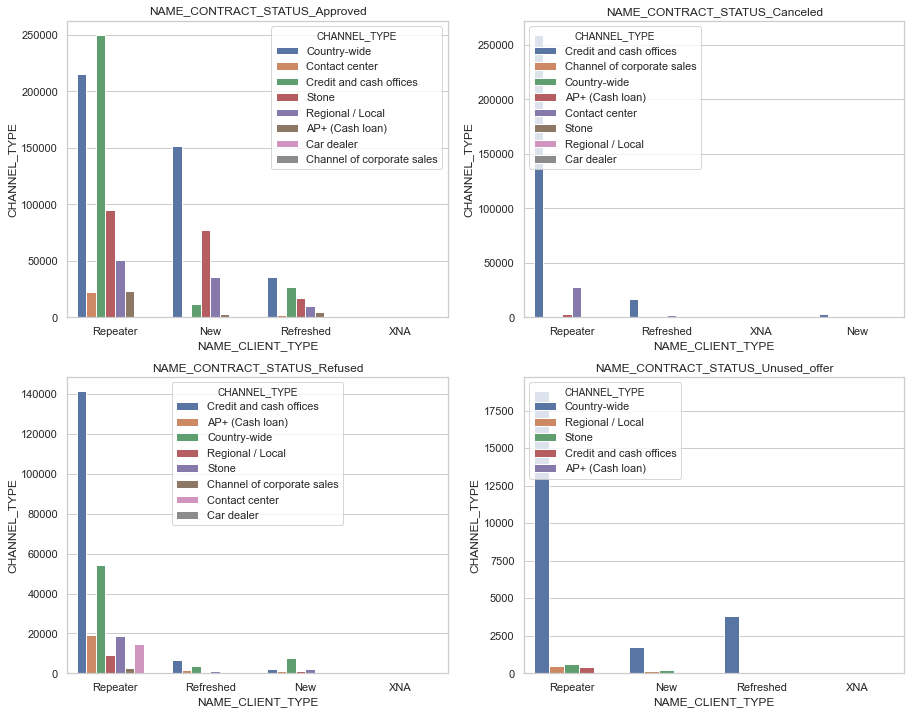

In [139]:
# Bivariate analysis for "NAME_CLIENT_TYPE" "CHANNEL_TYPE" variables.

plt.figure(figsize = (15, 12))
plt.subplot(2, 2, 1)
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "CHANNEL_TYPE", data = NAME_CONTRACT_STATUS_Approved)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("CHANNEL_TYPE")
plt.title("NAME_CONTRACT_STATUS_Approved")

plt.subplot(2, 2, 2)
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "CHANNEL_TYPE", data = NAME_CONTRACT_STATUS_Canceled)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("CHANNEL_TYPE")
plt.title("NAME_CONTRACT_STATUS_Canceled")

plt.subplot(2, 2, 3)
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "CHANNEL_TYPE", data = NAME_CONTRACT_STATUS_Refused)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("CHANNEL_TYPE")
plt.title("NAME_CONTRACT_STATUS_Refused")

plt.subplot(2, 2, 4)
sns.countplot(x = "NAME_CLIENT_TYPE", hue = "CHANNEL_TYPE", data = NAME_CONTRACT_STATUS_Unused_offer)
plt.xlabel("NAME_CLIENT_TYPE")
plt.ylabel("CHANNEL_TYPE")
plt.title("NAME_CONTRACT_STATUS_Unused_offer")
plt.show() 

Observation :-

1. Most approved loans were from Country-wide Channel where client type is repeater
2. Most refused loans were from Credit and Cash Offices Channel.

Even here also the same variables, as we seen in our Application data, has been contributing more to the DEFAULTERS Identification

### 6. Final Words

#### Based on analysis, defining the results and conclusion.

1. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
2. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.
3. The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
4. In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest
5. The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.
6. Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.
7. The clients that owns a car are almost a half of the ones that doesn't own one. The clients that own a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%.
8. The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.
9. Maximum clients fail to repay the loan if they apply for the Cash Loan and has client type as Unaccompanied. most defaulter are from this category.
10. Bank should focus on client who has income type as "Working" they are more likely to pay the loans
11. Bank should foucs on client who has higher educationn they are less likely to be a defaulter.